In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import openpyxl
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 32  # Set default font size
rcParams['axes.titlesize'] = 24
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['legend.fontsize'] = 18
rcParams['figure.titlesize'] = 32

In [2]:
FILE_PATH = os.path.join('..', 'raw data', '20250417')
FIGSIZE = (10, 8)
TMP_DIR = "./tmp"

# Ensure temporary directories exist
os.makedirs(TMP_DIR, exist_ok=True)

dir_list = list(filter(lambda x: os.path.isdir(os.path.join(FILE_PATH, x)),
                       os.listdir(FILE_PATH)))
print(pd.DataFrame(dir_list, columns=['Dirs']).head(99))
directory = int(input('choose one directory:'))
FILE_PATH = os.path.join(FILE_PATH, dir_list[directory])
file_list = os.listdir(FILE_PATH)
file_list.sort(key=lambda x: os.path.getmtime(os.path.join(FILE_PATH, x)))
FormingDC_file_list = list(filter(lambda x: 'Forming' in x, file_list))
SetDC_file_list = list(filter(lambda x: 'Set' in x, file_list))
ResetDC_file_list = list(filter(lambda x: 'Reset' in x, file_list))
read_file_list = list(filter(lambda x: 'read' in x, file_list))
file_list = list(filter(lambda x: 'Forming' in x or 'Set' in x
                        or 'Reset' in x, file_list))
FIG_TITLE = FILE_PATH.split('/')[-1].split('(')[0]

df = [[], [], [], [], []]
device_to_file = {}
for index, file in enumerate(file_list, start=1):
    curr_df = pd.read_csv(os.path.join(FILE_PATH, file)) if 'csv' in file \
        else pd.read_excel(os.path.join(FILE_PATH, file))
    length = curr_df.shape[0]
    df[0].extend(curr_df['MeasResult1_value'].values)  # Vd
    df[1].extend(curr_df['MeasResult2_value'].values)  # Id
    df[2].extend(curr_df['MeasResult1_time'].values)   # Time
    df[3].extend([index] * length)
    device_to_file[f'{index}'] = file
    operation = (['Forming'] if 'Forming' in file
                 else ['Set'] if 'Set' in file
                 else ['Reset'] if 'Reset' in file else None)
    df[4].extend(operation * length)
df = pd.DataFrame(np.transpose(df),
                  columns=['Vd (V)', 'Id (A)', 'Time (s)', 'Device', 'Operation'])
df['Vd (V)'] = pd.to_numeric(df['Vd (V)'])
df['Id (A)'] = pd.to_numeric(df['Id (A)'], errors='coerce')
df['Time (s)'] = pd.to_numeric(df['Time (s)'])
df['abs(Id)'] = abs(df['Id (A)'])
df['Resistance (Ohm)'] = \
    abs(df['Vd (V)'] / df['Id (A)']).where(df['Vd (V)'] != 0)

                            Dirs
0                  HfO2_1r_0_0_0
1            HfO2_1r_0_0_1_pulse
2           HfO2_1r_0_7_1_11to40
3            HfO2_1r_0_7_1_1to10
4           HfO2_1r_0_7_1_41to60
5                  HfO2_1r_0_7_2
6   HfO2_1r_0_7_4_pulse_101to200
7     HfO2_1r_0_7_4_pulse_1to100
8   HfO2_1r_0_7_4_pulse_201to300
9                  HfO2_1r_1_0_0
10                 HfO2_1r_1_0_2
11           HfO2_1r_1_0_2_pulse


choose one directory: 8


In [3]:
print(FILE_PATH)
print(FIG_TITLE)

../raw data/20250417/HfO2_1r_0_7_4_pulse_201to300
HfO2_1r_0_7_4_pulse_201to300


In [4]:
if len(FormingDC_file_list) != 0:
    forming_df = df[df.Operation == 'Forming']
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=FIGSIZE)
    sns.lineplot(data=forming_df, x='Vd (V)', y='Id (A)', estimator=None,
                 sort=False)
    plt.title("Forming(linear)")
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=FIGSIZE)
    sns.lineplot(data=forming_df, x='Vd (V)', y='Id (A)', estimator=None,
                 sort=False)
    ax.set(title="Forming(log)", yscale='log')
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=FIGSIZE)
    sns.lineplot(data=forming_df, x='Vd (V)', y='Id (A)', hue='Device',
                 palette='YlGn', estimator=None, sort=False, legend=False, ax=ax)
    ax.set(title="Forming(log)", yscale='log')
    plt.show()

../raw data/20250417/HfO2_1r_0_7_4_pulse_201to300/4_21_2025 10_34_31 PM  [HfO2_1r_0_7_4(1) read1_1u; ].csv
../raw data/20250417/HfO2_1r_0_7_4_pulse_201to300/4_21_2025 10_34_58 PM  [HfO2_1r_0_7_4(2) read1_1u; ].csv
../raw data/20250417/HfO2_1r_0_7_4_pulse_201to300/4_21_2025 10_35_24 PM  [HfO2_1r_0_7_4(3) read1_1u; ].csv
../raw data/20250417/HfO2_1r_0_7_4_pulse_201to300/4_21_2025 10_35_51 PM  [HfO2_1r_0_7_4(4) read1_1u; ].csv
../raw data/20250417/HfO2_1r_0_7_4_pulse_201to300/4_21_2025 10_36_18 PM  [HfO2_1r_0_7_4(5) read1_1u; ].csv
../raw data/20250417/HfO2_1r_0_7_4_pulse_201to300/4_21_2025 10_36_44 PM  [HfO2_1r_0_7_4(6) read1_1u; ].csv
../raw data/20250417/HfO2_1r_0_7_4_pulse_201to300/4_21_2025 10_37_10 PM  [HfO2_1r_0_7_4(7) read1_1u; ].csv
../raw data/20250417/HfO2_1r_0_7_4_pulse_201to300/4_21_2025 10_39_27 PM  [HfO2_1r_0_7_4(8) read1_1u; ].csv
../raw data/20250417/HfO2_1r_0_7_4_pulse_201to300/4_21_2025 10_39_54 PM  [HfO2_1r_0_7_4(9) read1_1u; ].csv
../raw data/20250417/HfO2_1r_0_7_4_pu

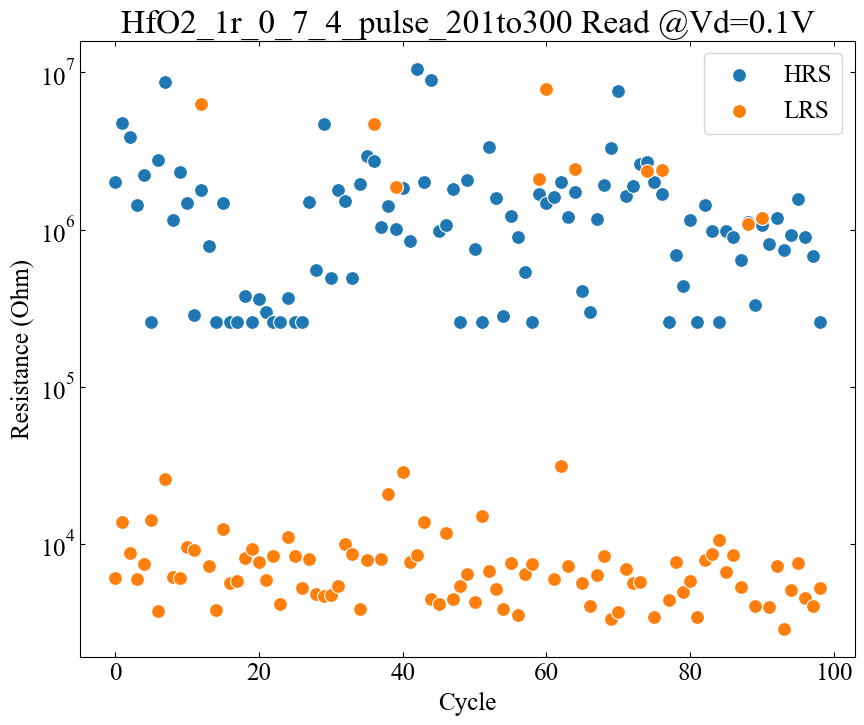

In [5]:
def load_single_file(file: str) -> pd.DataFrame:
    """
    Loads a single file (CSV or Excel) and returns its contents as a DataFrame.
    """
    file_full = os.path.join(FILE_PATH, file)
    # print(file_full)
    if "csv" in file.lower():
        return pd.read_csv(file_full)
    else:
        return pd.read_excel(file_full)


def extract_measurement(df: pd.DataFrame) -> list:
    """
    Extracts measurement values from a DataFrame.
    Returns a list containing the absolute values of Id and Vd from the second row.
    """
    try:
        # Use .iloc[1] for clarity; you might want to add checks if the DataFrame is empty
        return [abs(df['MeasResult1_value'].mean()), abs(df['MeasResult2_value'].mean())]
    except (IndexError, KeyError) as e:
        print("Error extracting measurement:", e)
        print(df)
        return None


def process_file_group(file_list: list) -> pd.DataFrame:
    """
    Process a list of files into a DataFrame containing 'Id' and 'Vd' columns.
    Also computes resistance as Vd/Id.
    """
    measurements = []
    for file in file_list:
        df_file = load_single_file(file)
        meas = extract_measurement(df_file)
        if meas is not None:
            measurements.append(meas)
    if len(measurements) == 0:
        df_result = pd.DataFrame(columns=["Vd (V)", "Id (A)"])
        return df_result
    df_result = pd.DataFrame(np.array(measurements), columns=["Vd (V)", "Id (A)"])
    df_result["Resistance (Ohm)"] = df_result["Vd (V)"] / df_result["Id (A)"]
    return df_result


def process_read_files_MIM(read_file_list: list) -> list:
    """
    Processes files from a given list for two groups (read1/HRS and read2/LRS).
    Returns a list with two DataFrames: [HRS, LRS].
    """
    # Filter files into groups based on naming patterns
    read1_files = [f for f in read_file_list if "read1_1u" in f]
    read2_files = [f for f in read_file_list if "read2_100u" in f]
    # read3_files = [f for f in read_file_list if "read2_1u" in f]
    # read4_files = [f for f in read_file_list if "read2_10u" in f]

    df_read1 = process_file_group(read1_files)
    df_read2 = process_file_group(read2_files)
    # df_read3 = process_file_group(read3_files)
    # df_read4 = process_file_group(read4_files)

    # df_read5 = pd.DataFrame(np.hstack((df_read3.values, df_read4.values)))
    # df_read5['Vd'] = df_read5.iloc[:, [0, 3]].mean(axis=1)
    # df_read5['Id'] = df_read5.iloc[:, [1, 4]].max(axis=1)
    # df_read5['Res'] = df_read5.iloc[:, [2, 5]].min(axis=1)

    # # Plot the combined read data
    # plot_read_data(df_read1, df_read4.loc[:, 'Vd':'Res'])

    # return [df_read1, df_read4.loc[:, 'Vd':'Res']]

    # Plot the combined read data
    plot_read_data(df_read1, df_read2)

    return [df_read1, df_read2]


def plot_read_data(df1: pd.DataFrame, df2: pd.DataFrame):
    """
    Plots the resistance for the two sets of read data.
    """
    fig, ax = plt.subplots(figsize=FIGSIZE)
    # title = f"{FIG_TITLE} Read @Vd={df1.loc[0, 'Vd']}V"
    title = f"{FIG_TITLE} Read @Vd=0.1V"
    ax.set(title=title, xlabel="Cycle", ylabel="Resistance (Ohm)", yscale="log")
    sns.scatterplot(x=df1.index, y=df1["Resistance (Ohm)"], label="HRS", ax=ax, markers="o", s=100)
    sns.scatterplot(x=df2.index, y=df2["Resistance (Ohm)"], label="LRS", ax=ax, markers="o", s=100)
    ax.tick_params(axis='both', which='major', direction='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor', bottom=False, top=False, left=False, right=False)
    plt.legend()
    output_file = os.path.join(TMP_DIR, f"{FIG_TITLE}_read_a.png")
    plt.savefig(output_file)
    plt.show()


read_df = process_read_files_MIM(read_file_list)

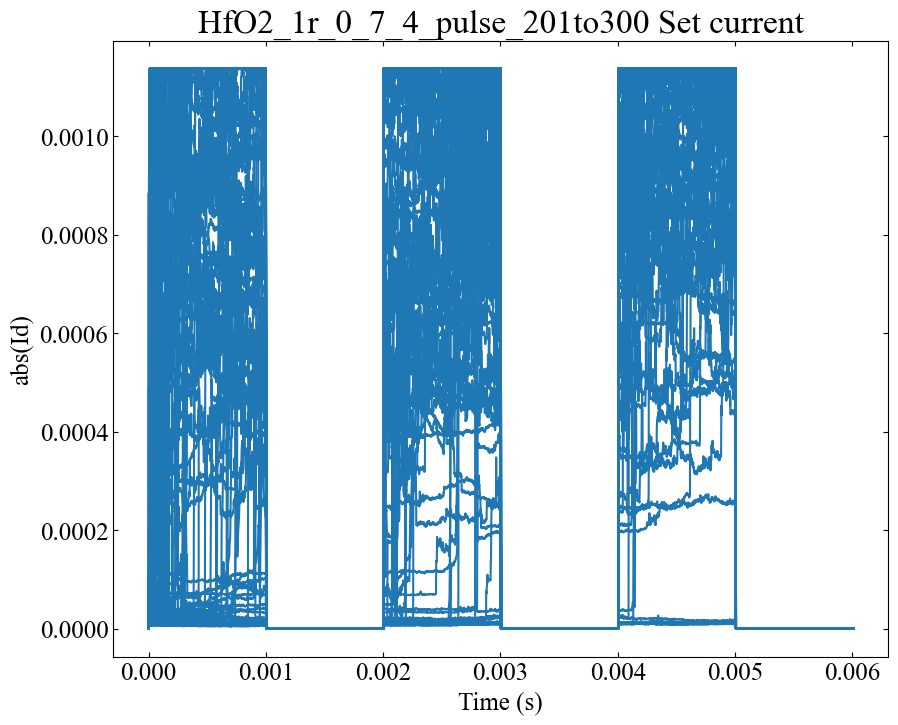

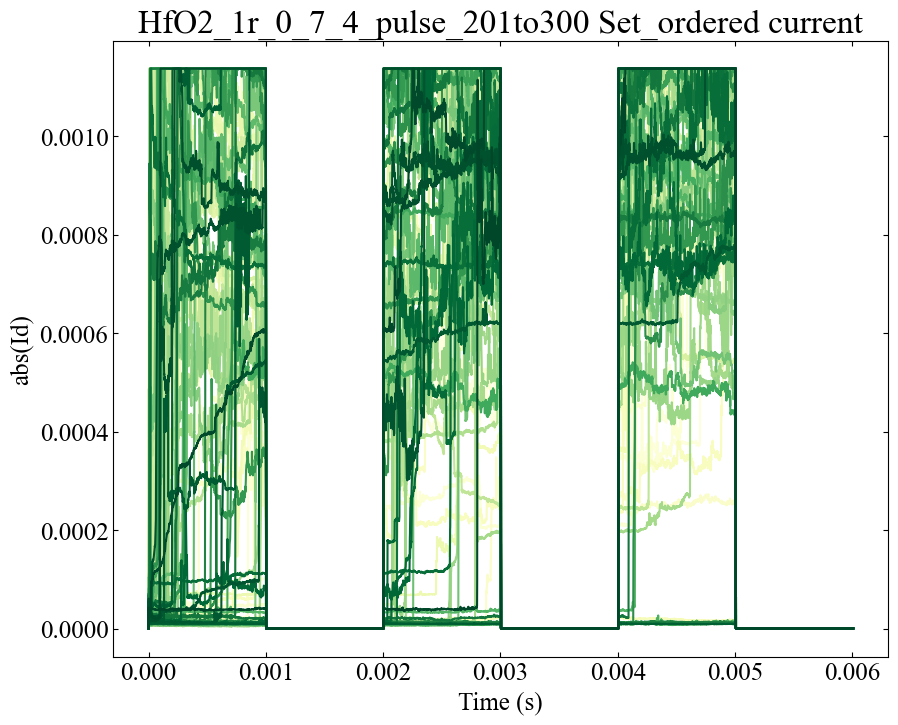

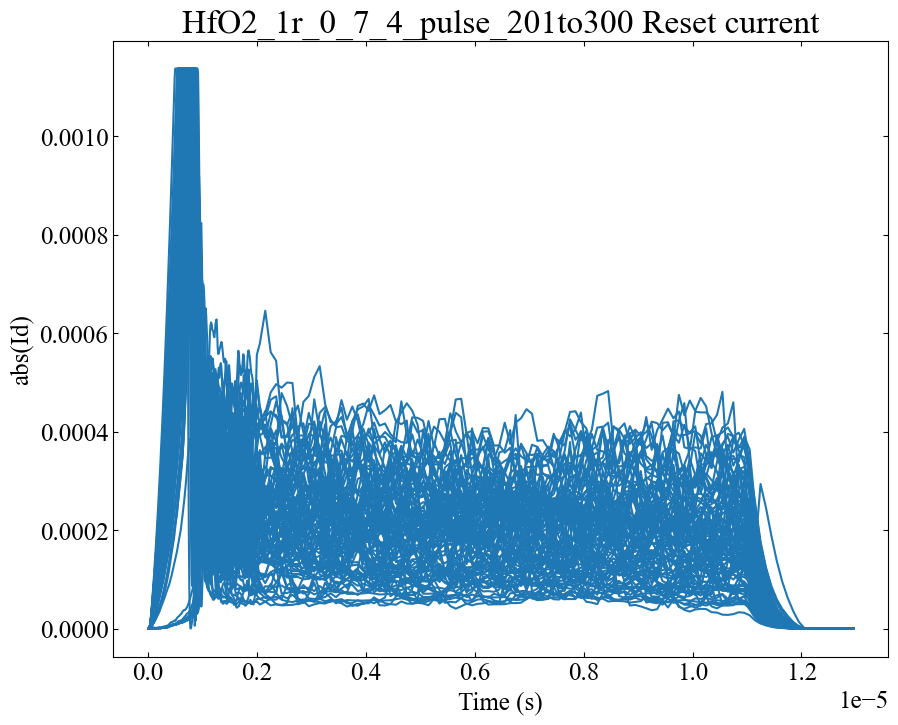

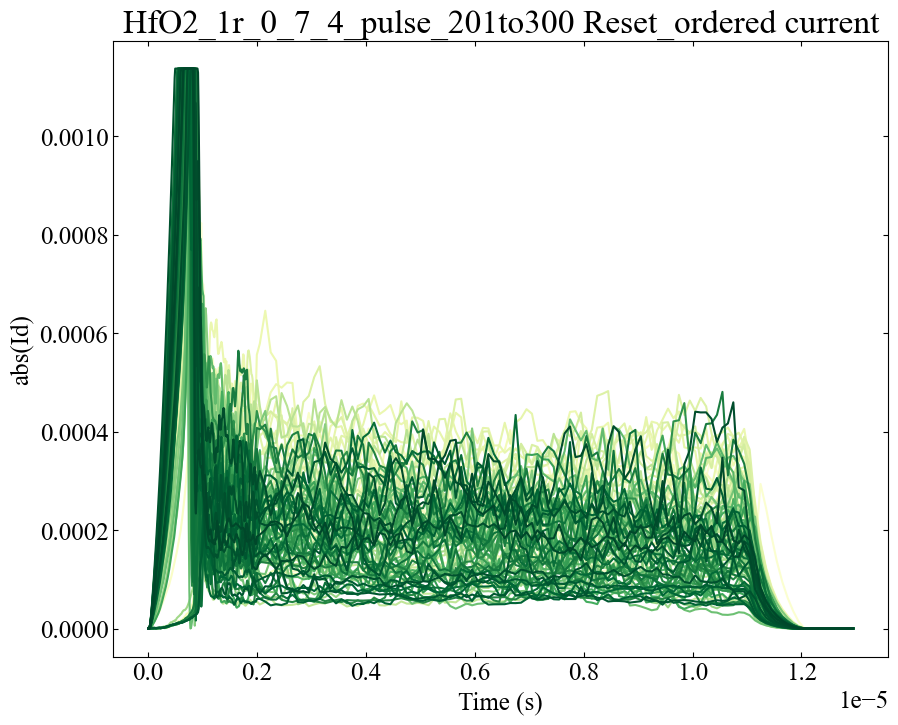

In [6]:
def plot_operation(df: pd.DataFrame, operation: str, plot_kwargs: dict = None, save_suffix: str = None):
    """
    Generic function to plot operation data.

    Parameters:
      df         : DataFrame containing operation data (e.g., 'Set' or 'Reset')
      operation  : Operation type, e.g., "Set" or "Reset"
      plot_kwargs: Additional keyword arguments for sns.lineplot
      save_suffix: Suffix for the output filename (if not provided, uses operation.lower())
    """
    plot_kwargs = plot_kwargs or {}
    save_suffix = save_suffix or operation.lower()

    fig, ax = plt.subplots(figsize=FIGSIZE)
    title = f"{FIG_TITLE} {operation} current"
    ax.set(title=title, yscale="linear")

    # Choose whether to use hue or not based on kwargs
    sns.lineplot(data=df, x="Time (s)", y="abs(Id)", units="Device", estimator=None, sort=False, ax=ax, **plot_kwargs)

    ax.tick_params(axis='both', which='major', direction='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor', bottom=False, top=False, left=False, right=False)
    output_file = os.path.join(TMP_DIR, f"{FIG_TITLE}_{save_suffix}.png")
    plt.savefig(output_file)
    plt.show()


# Plot for Set operation (basic version)
set_df = df[df.Operation == "Set"]
plot_operation(set_df, "Set")

# Plot for Set operation with ordered hues
plot_operation(set_df, "Set_ordered",
               plot_kwargs={"hue": "Device", "palette": "YlGn", "legend": False})

reset_df = df[df.Operation == "Reset"]
plot_operation(reset_df, "Reset")
plot_operation(reset_df, "Reset_ordered", plot_kwargs={"hue": "Device", "palette": "YlGn", "legend": False})

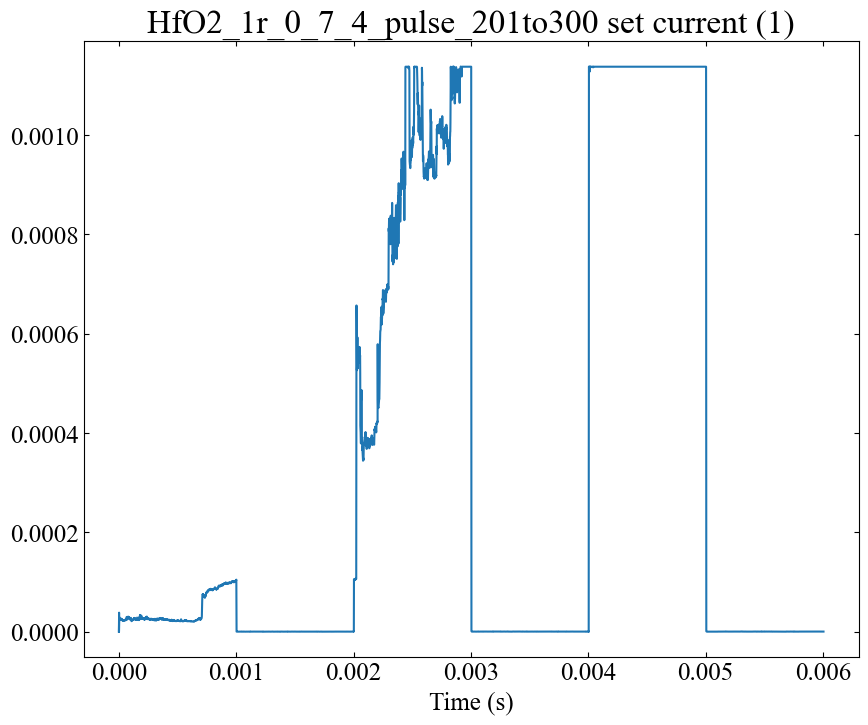

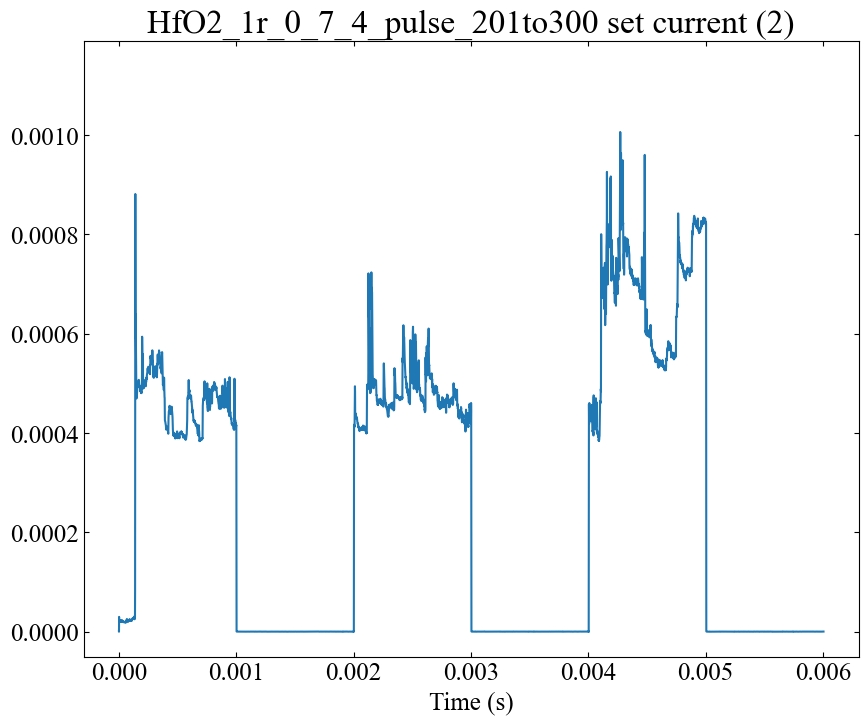

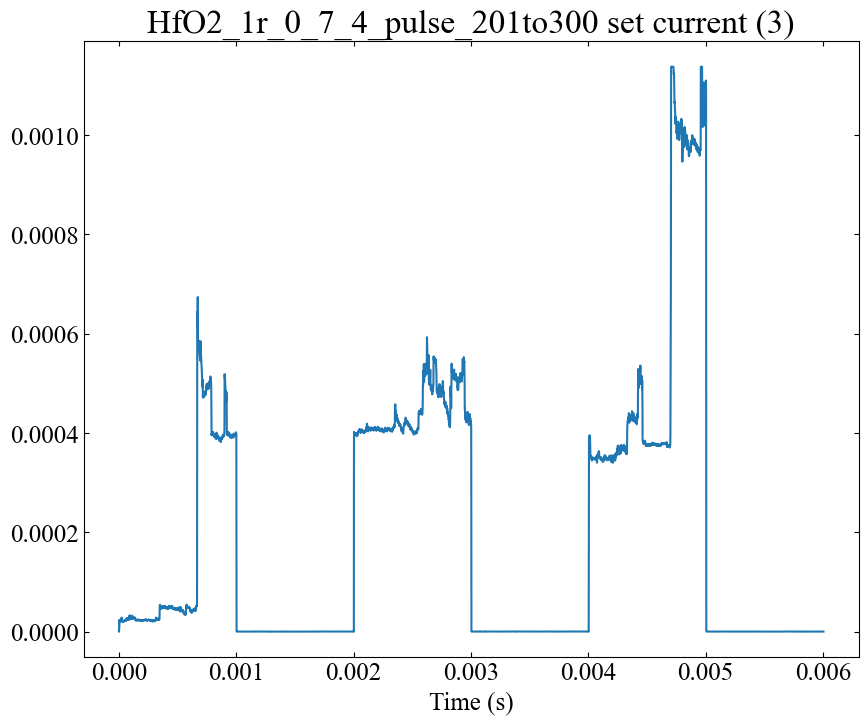

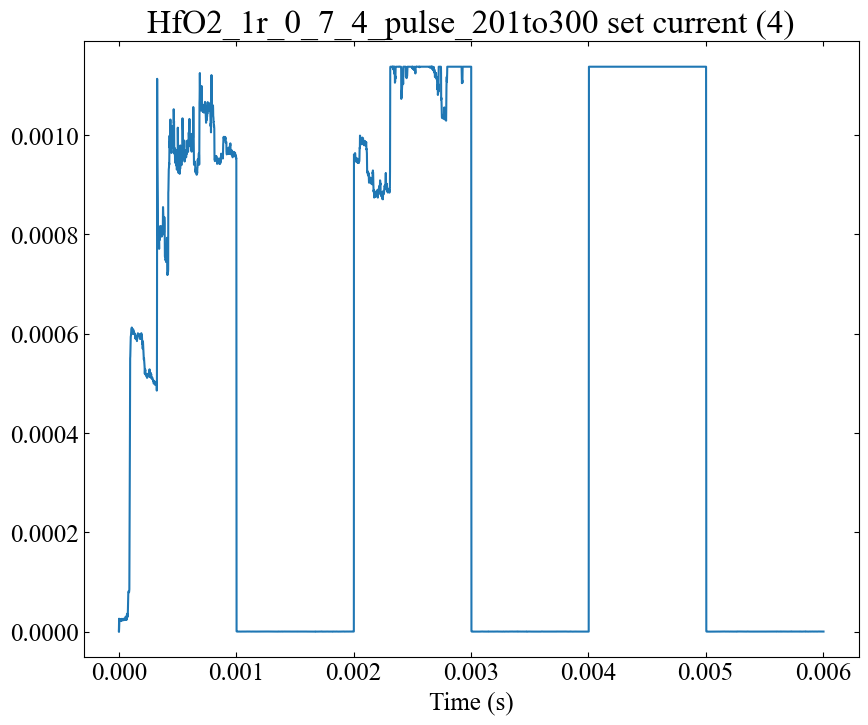

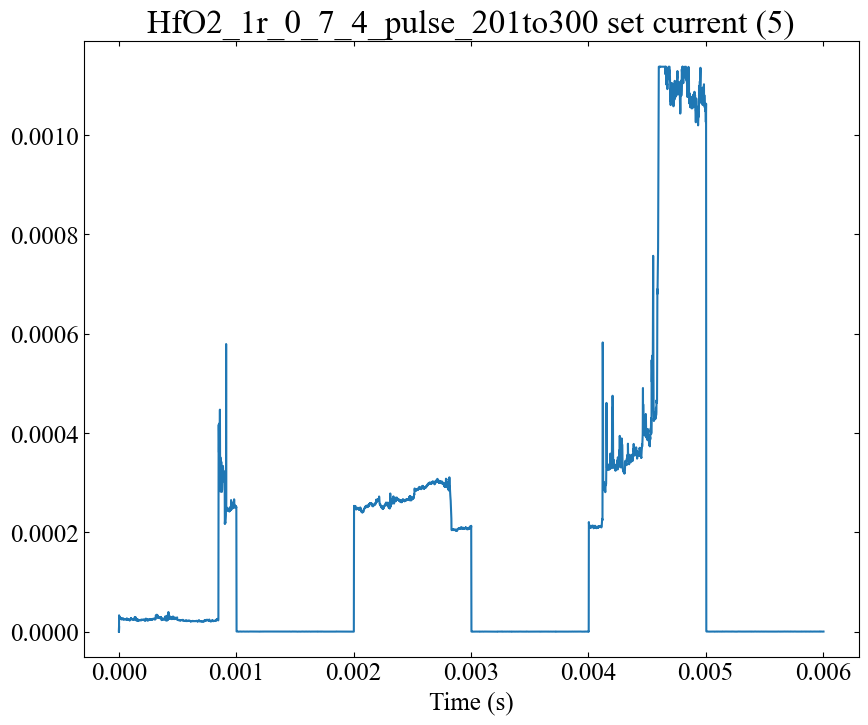

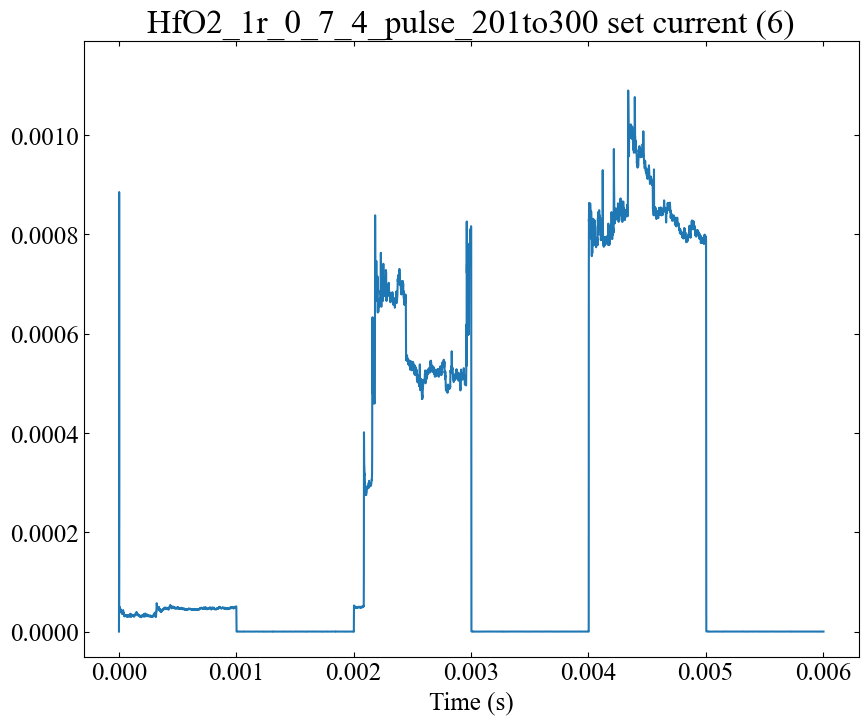

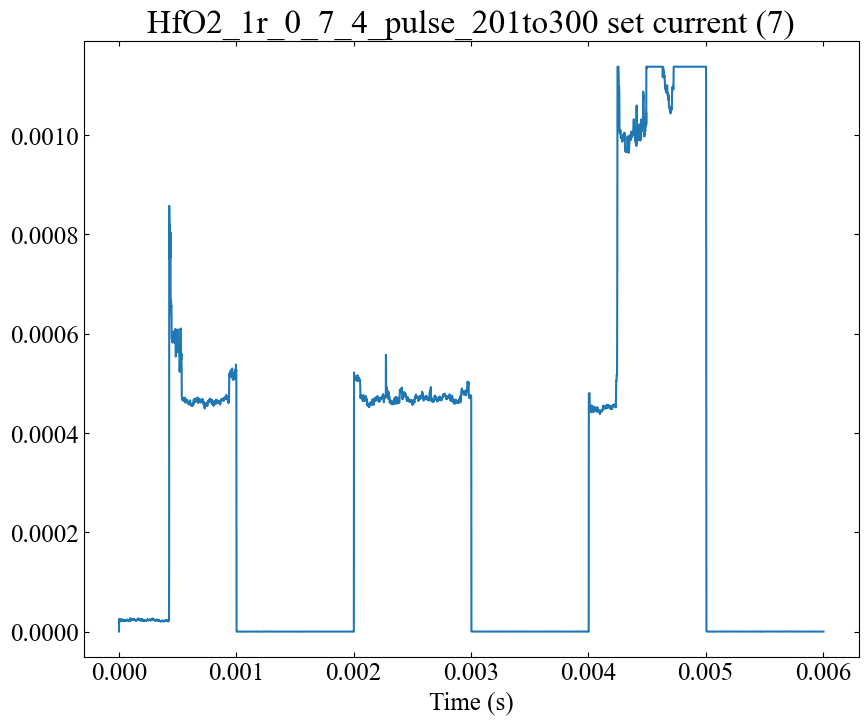

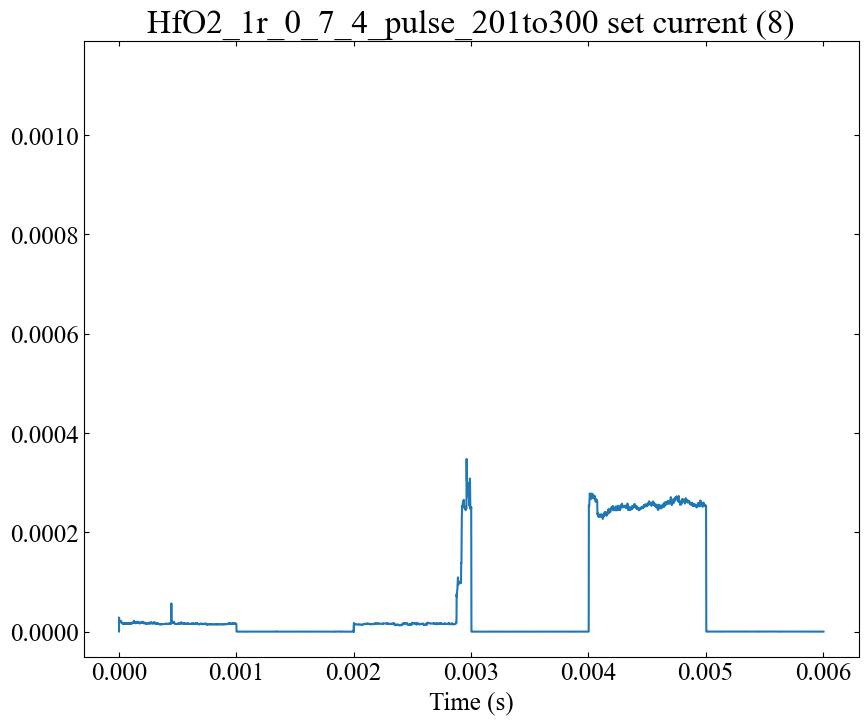

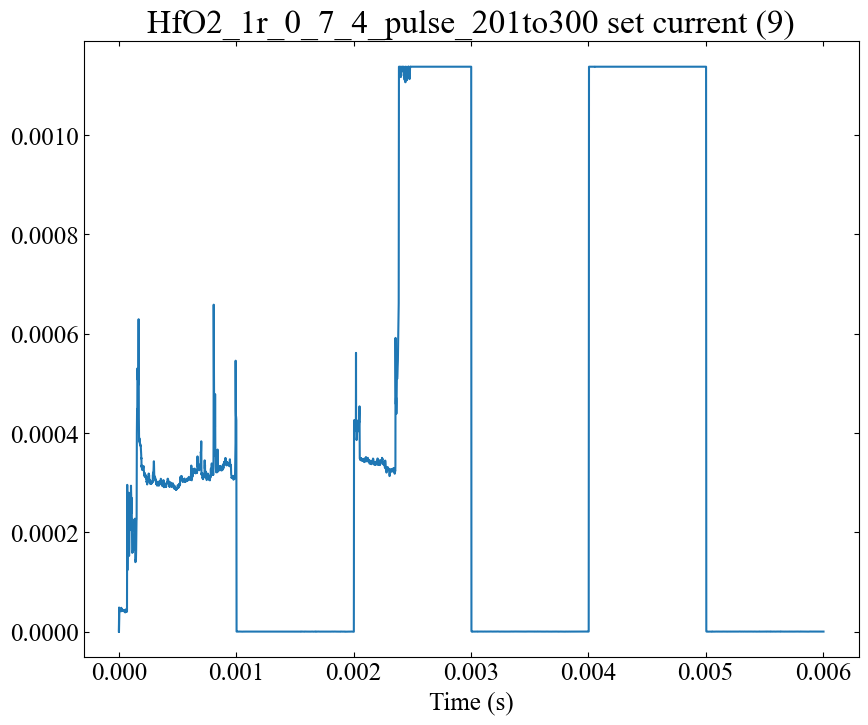

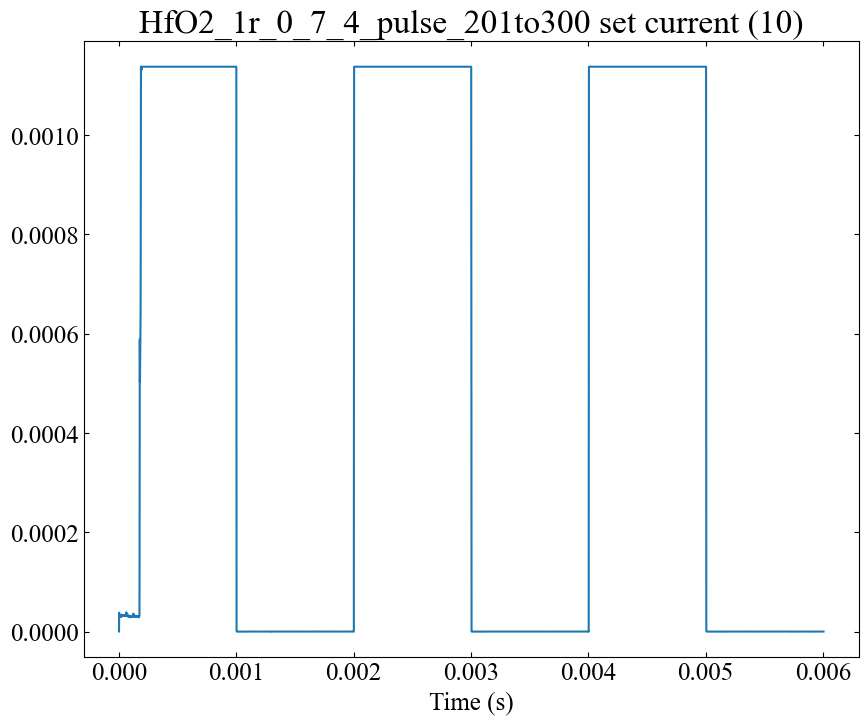

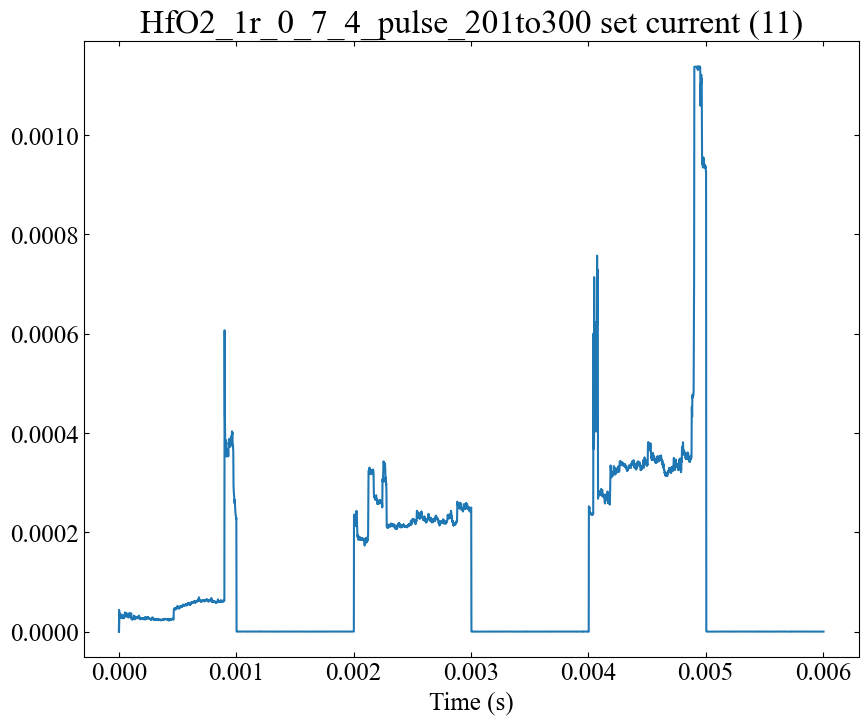

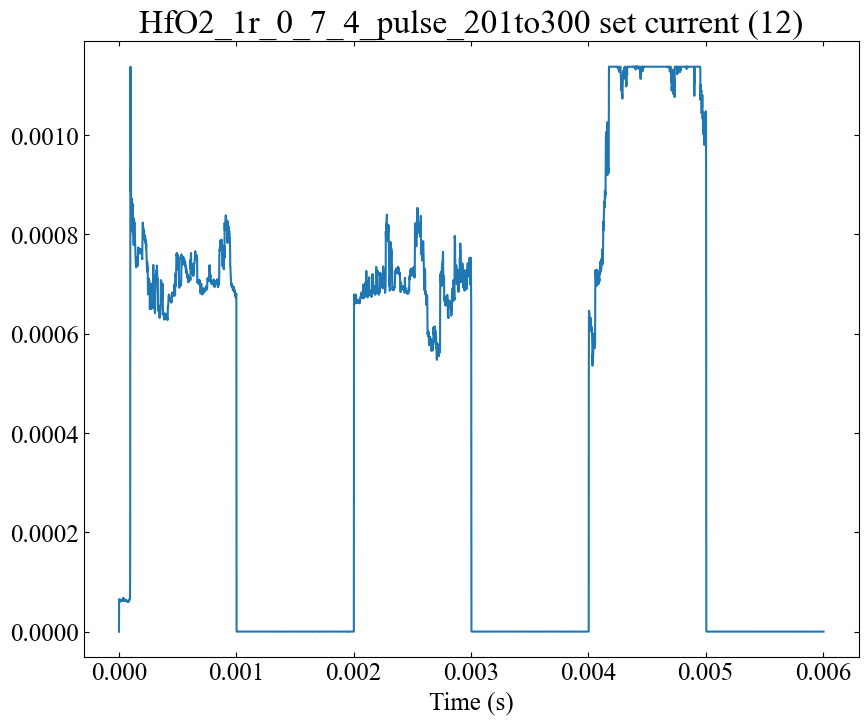

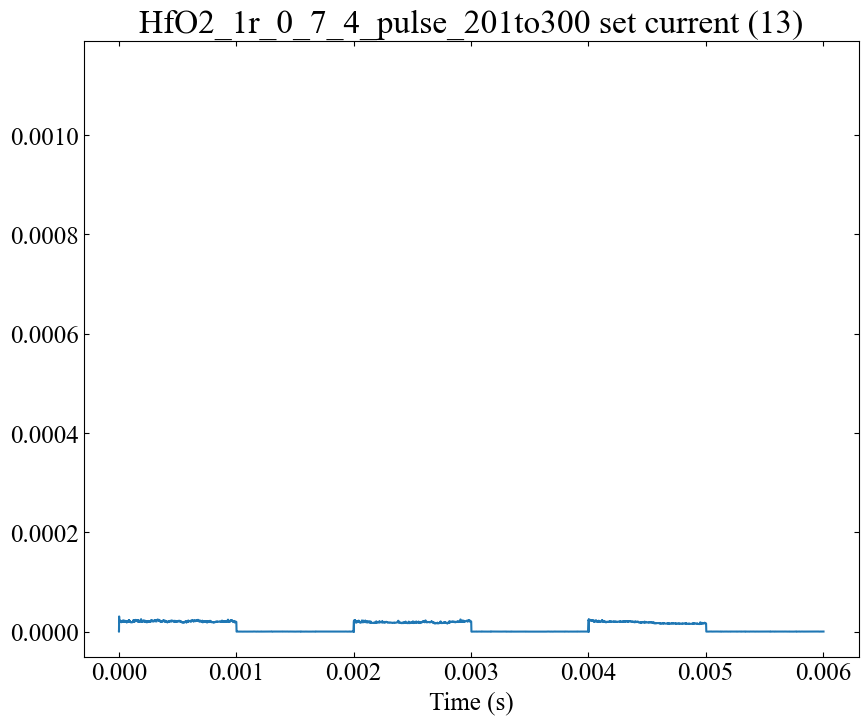

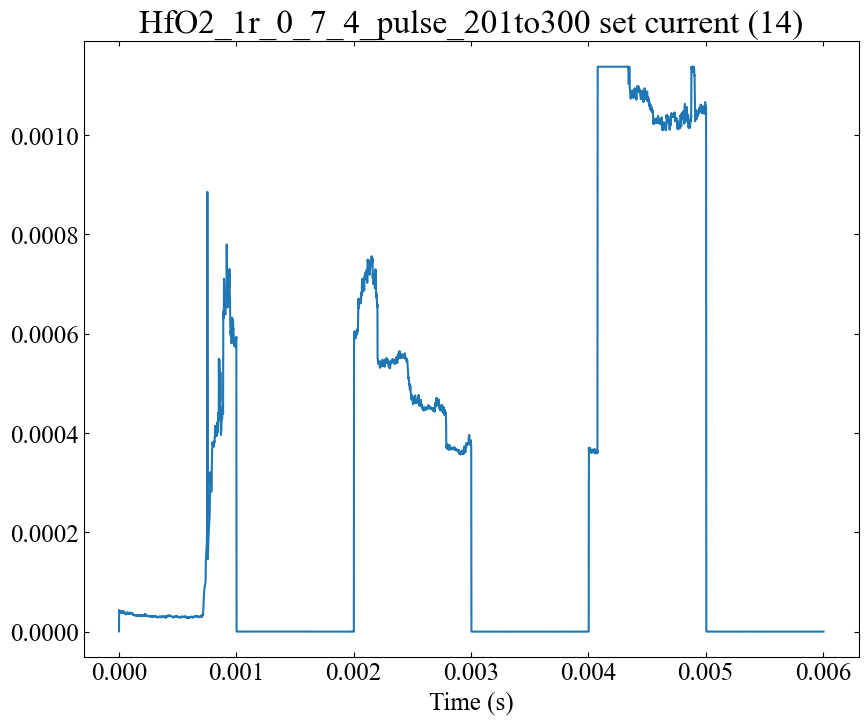

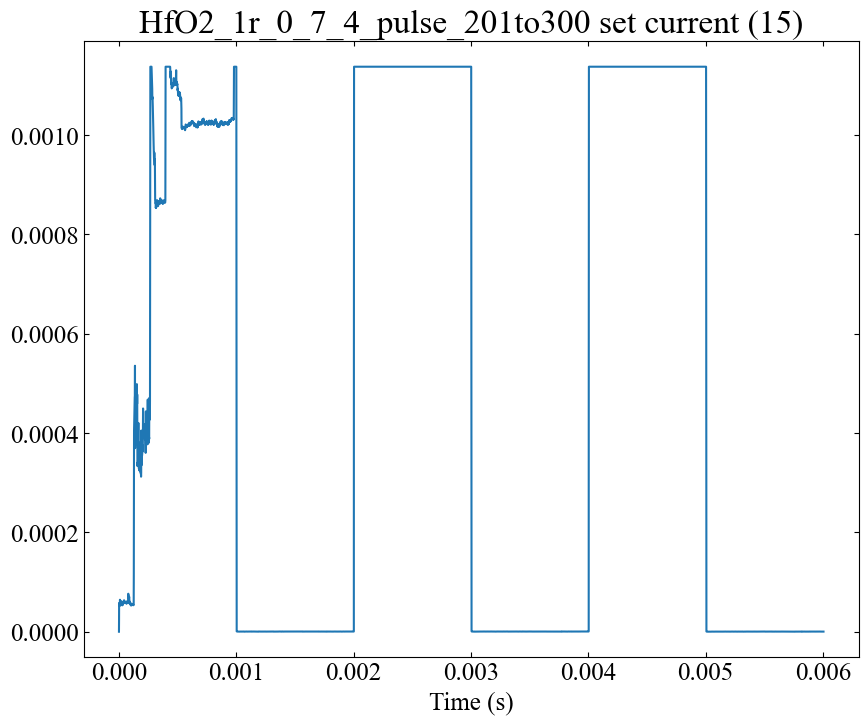

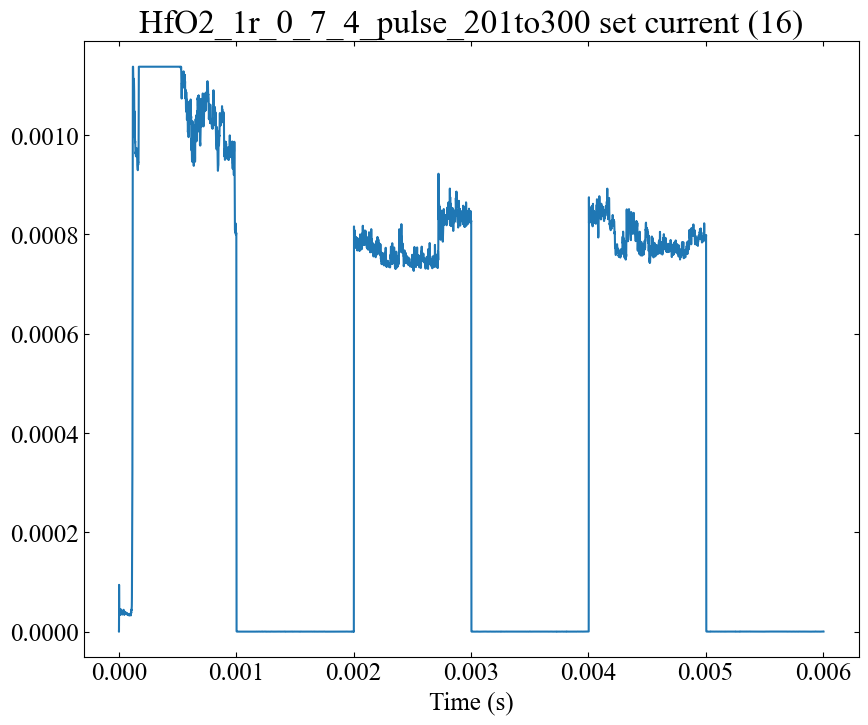

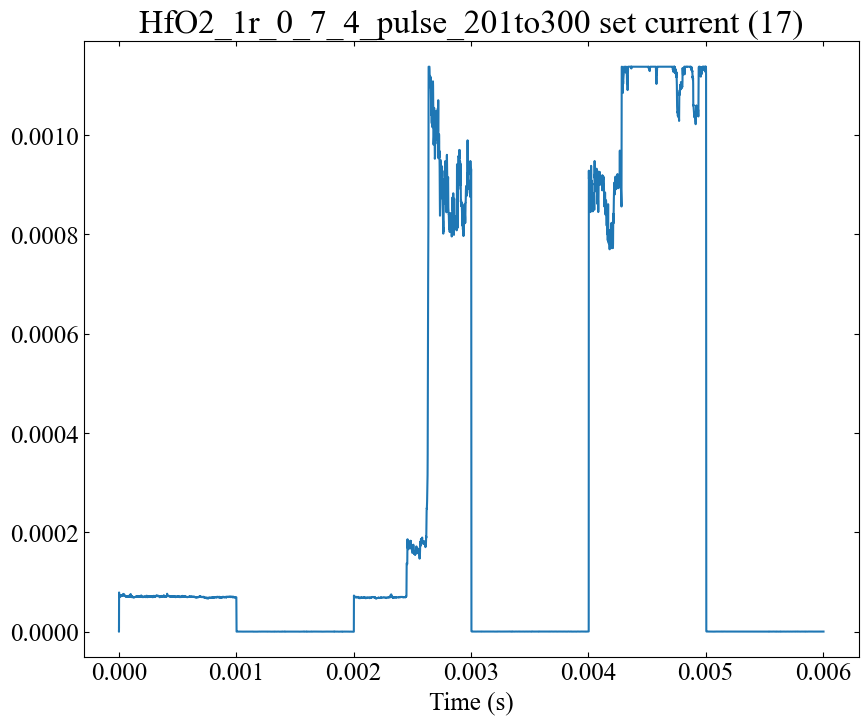

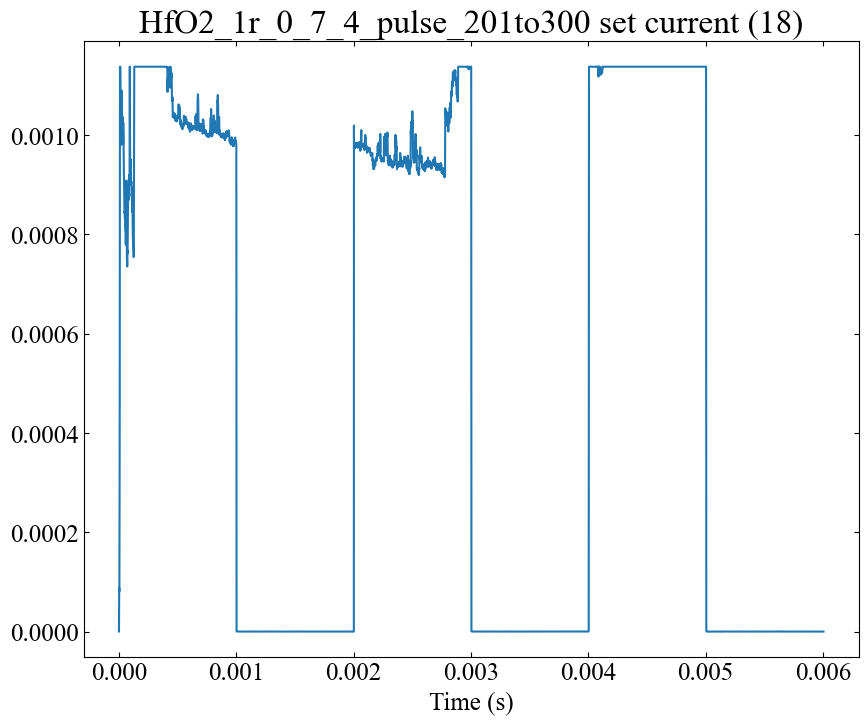

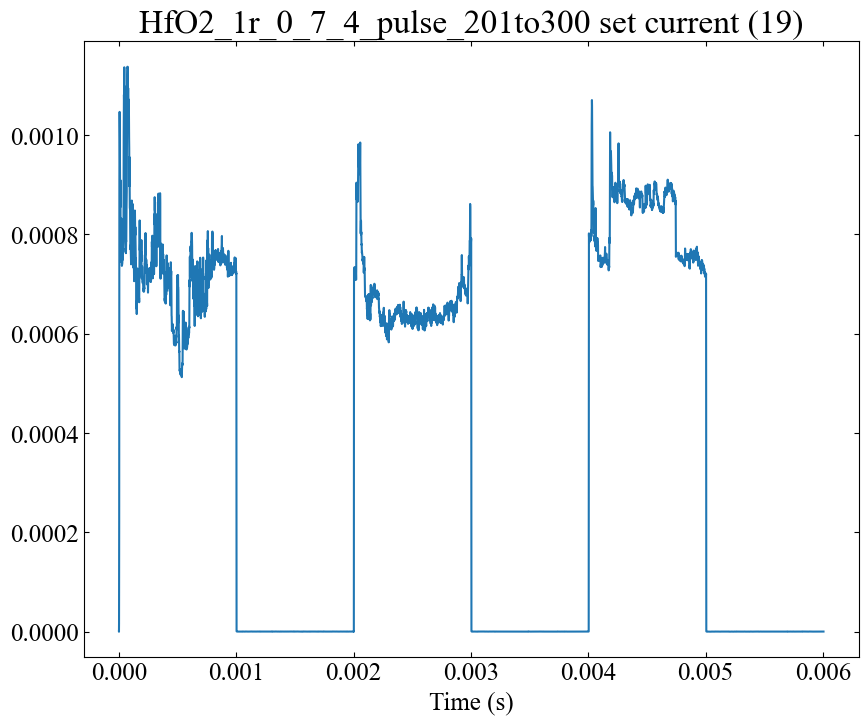

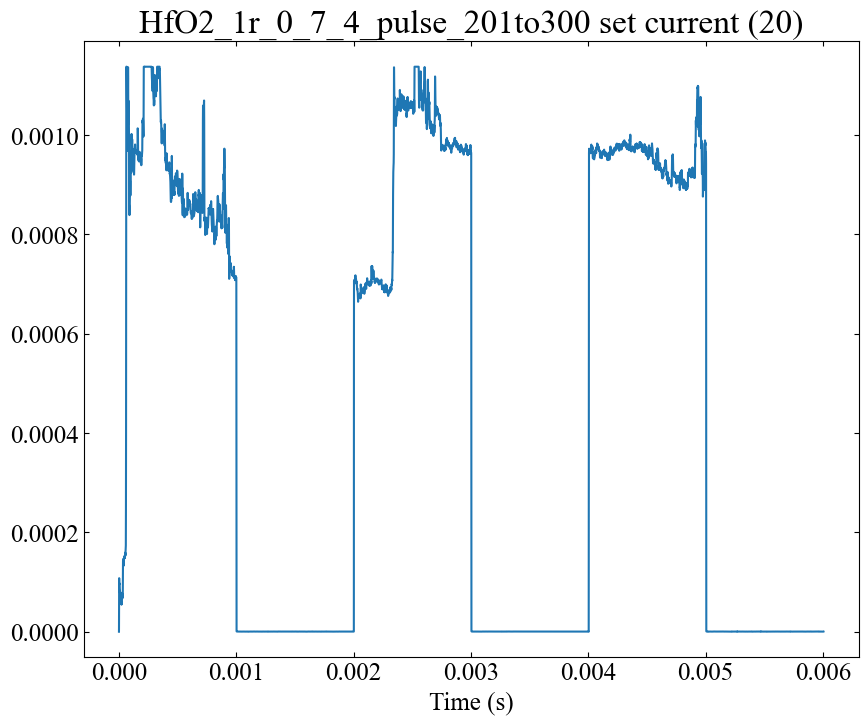

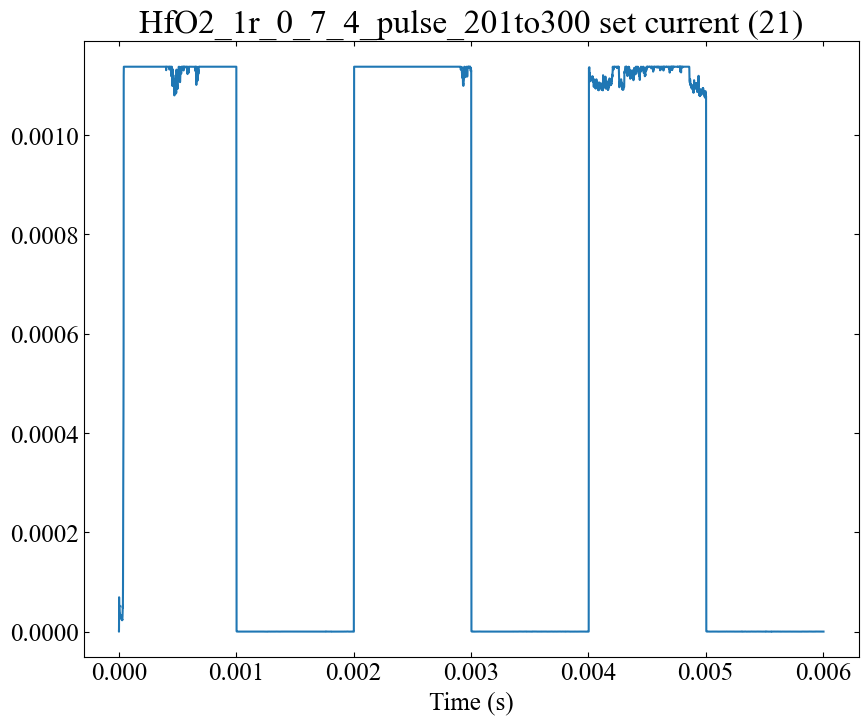

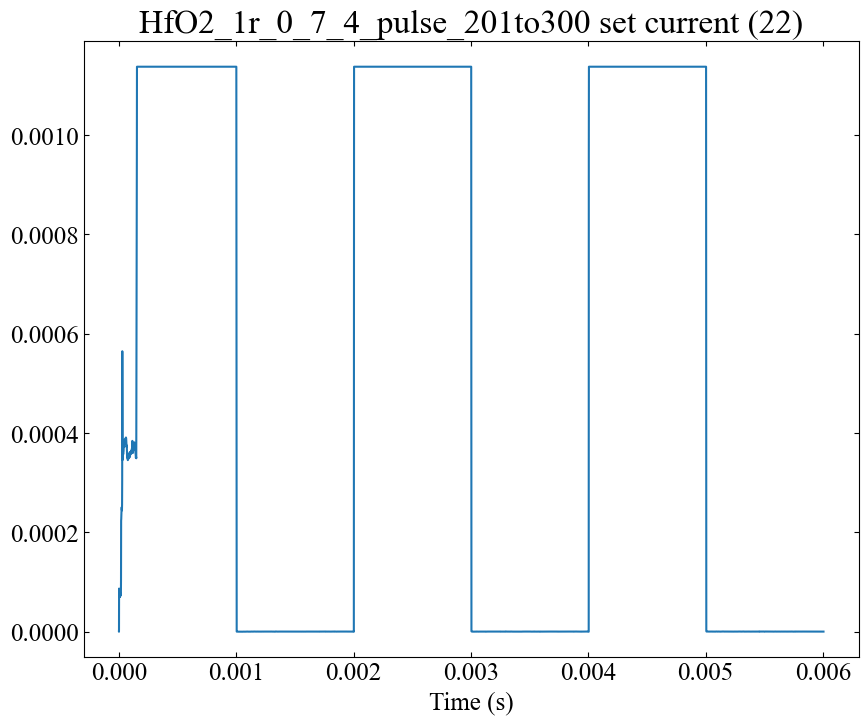

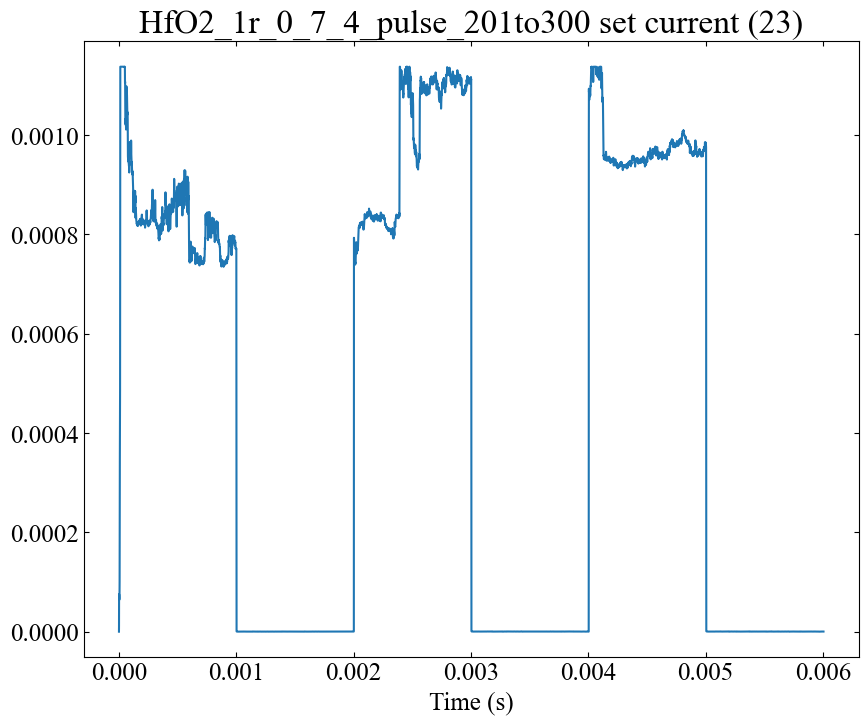

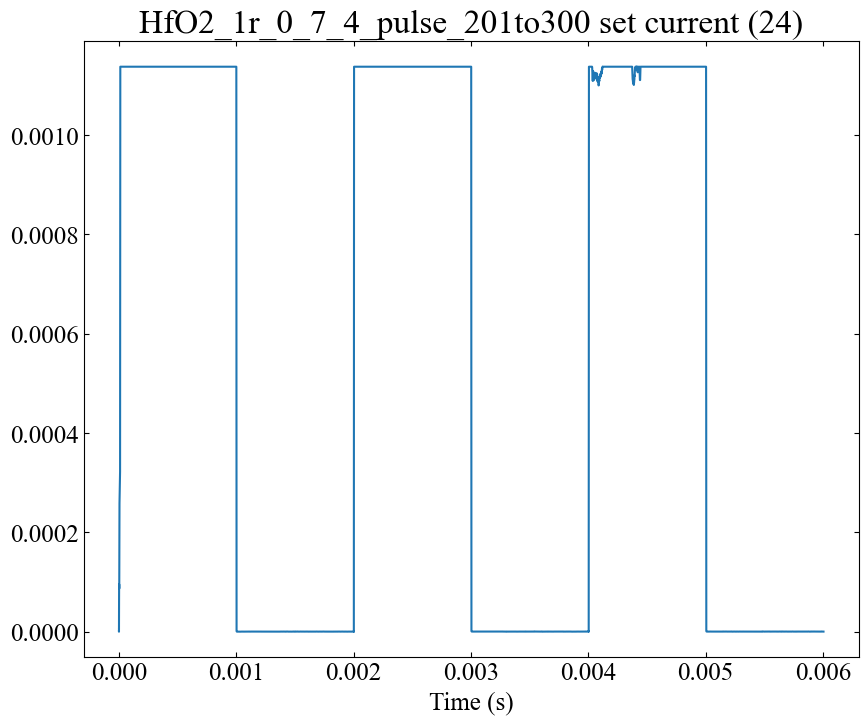

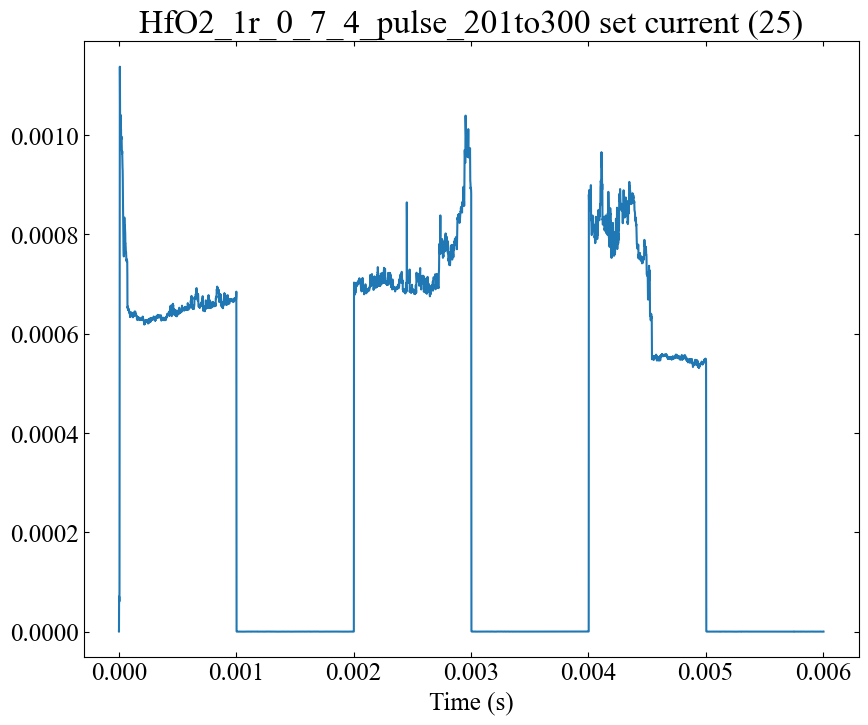

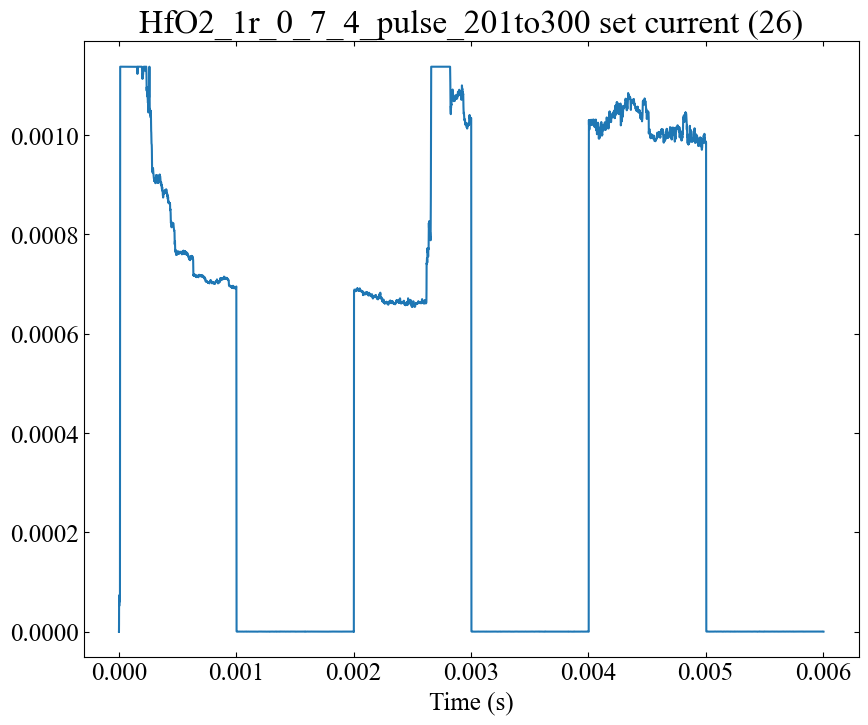

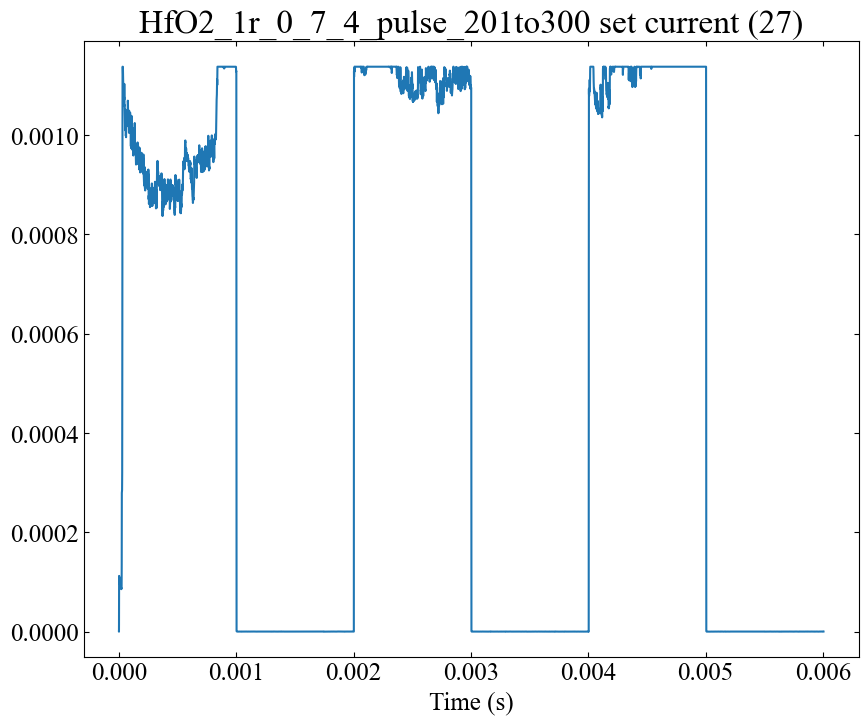

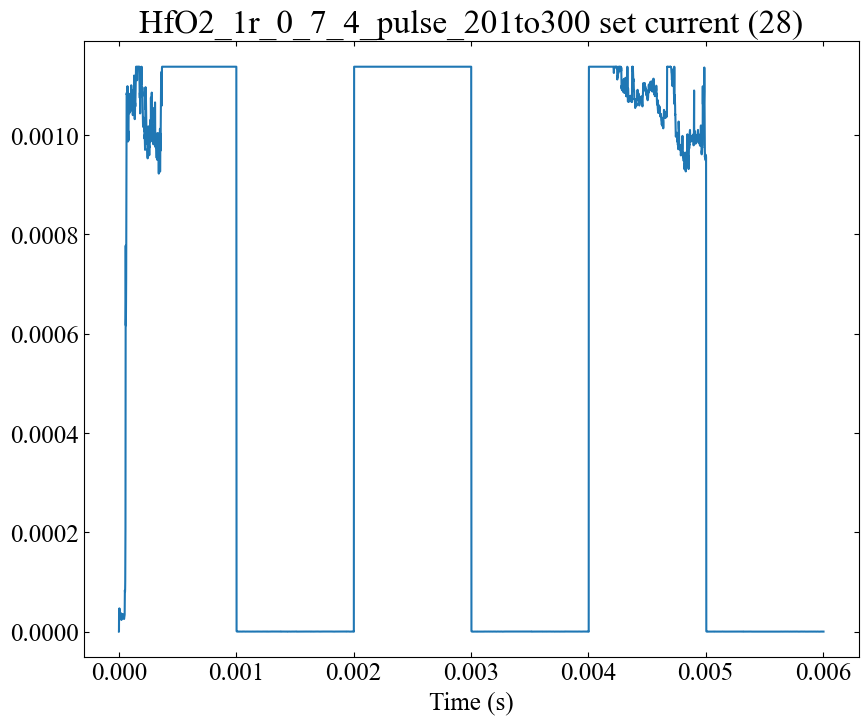

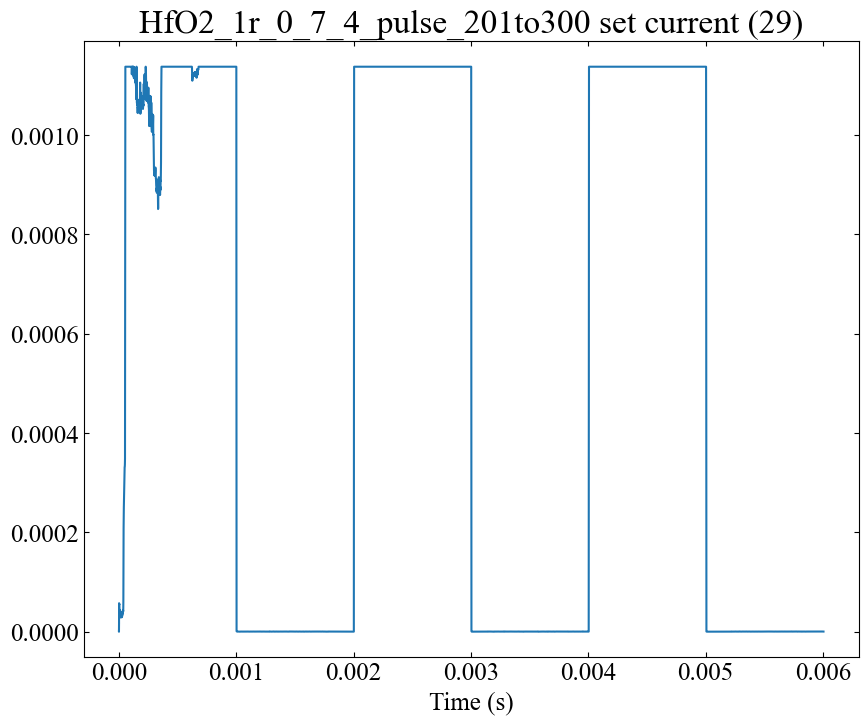

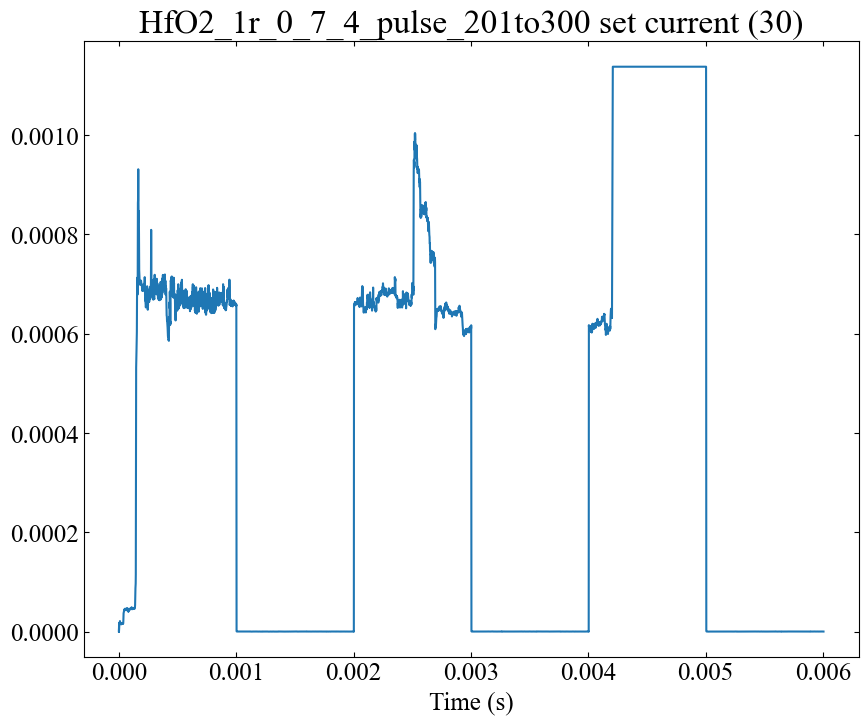

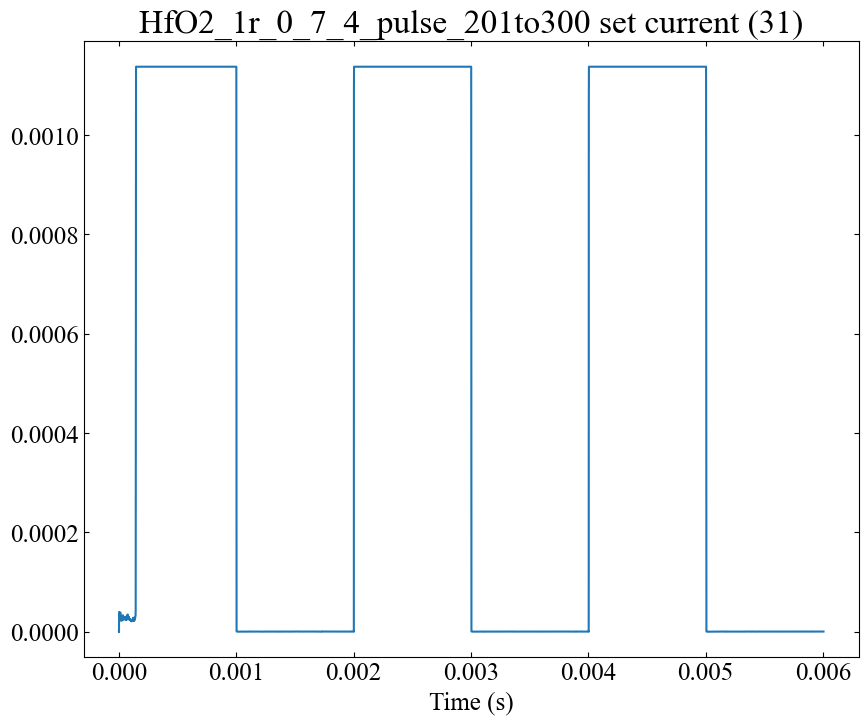

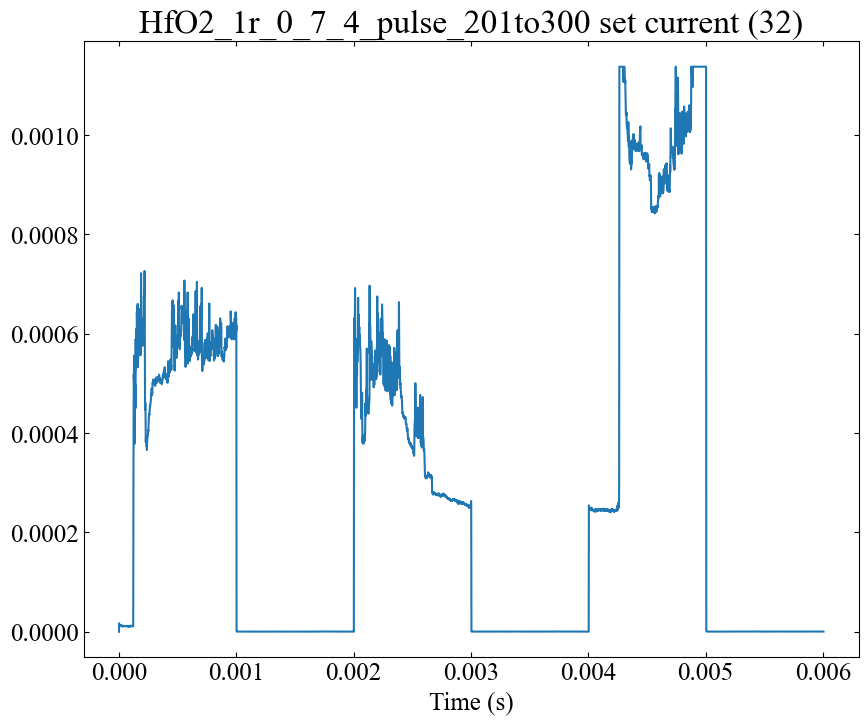

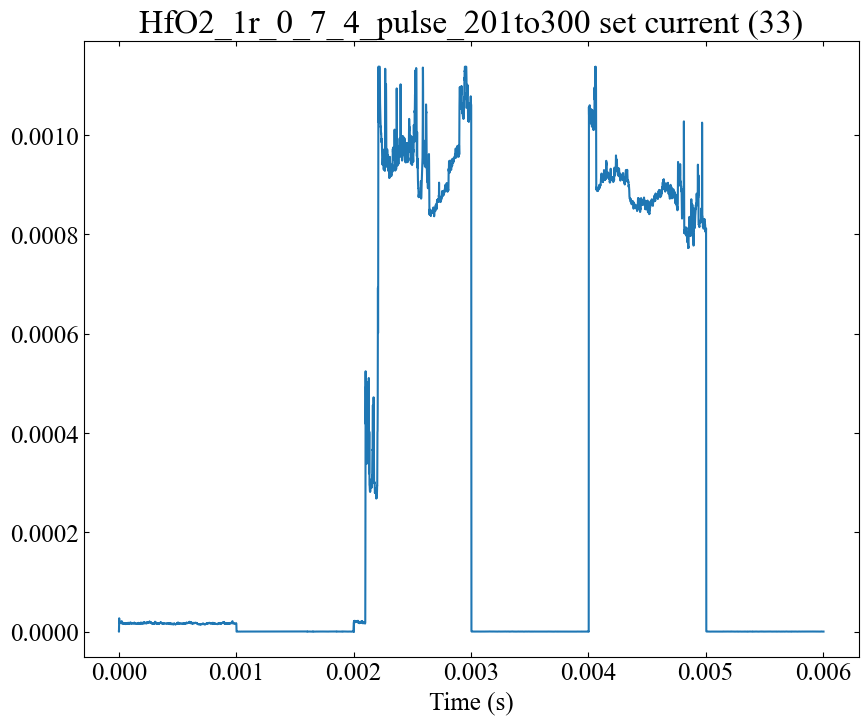

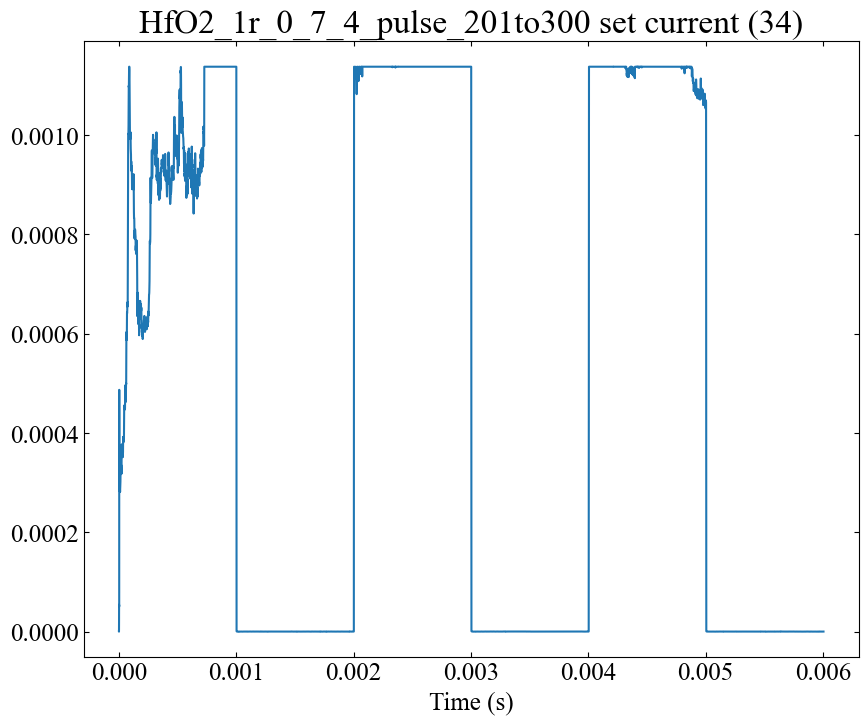

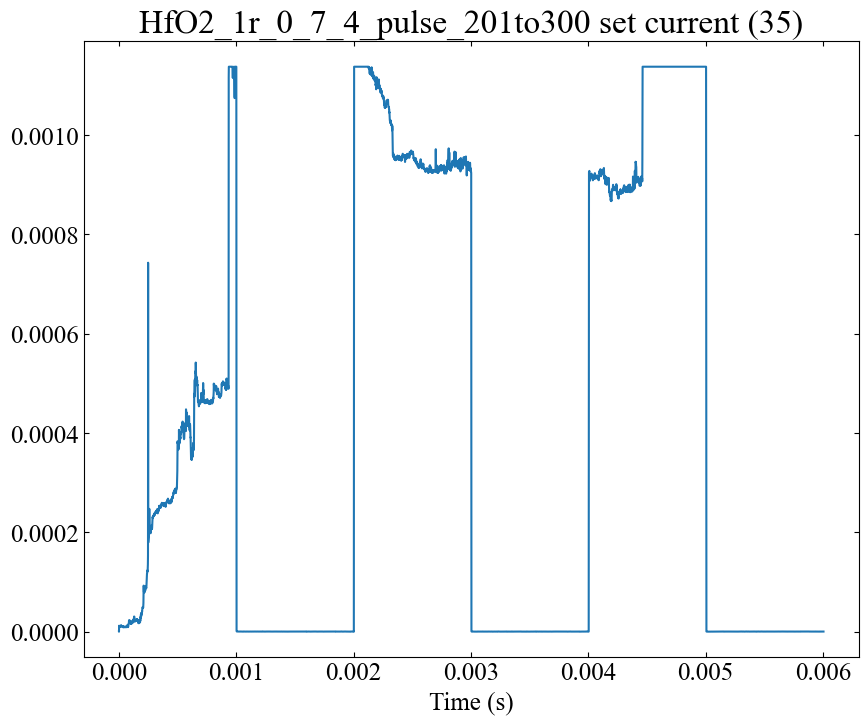

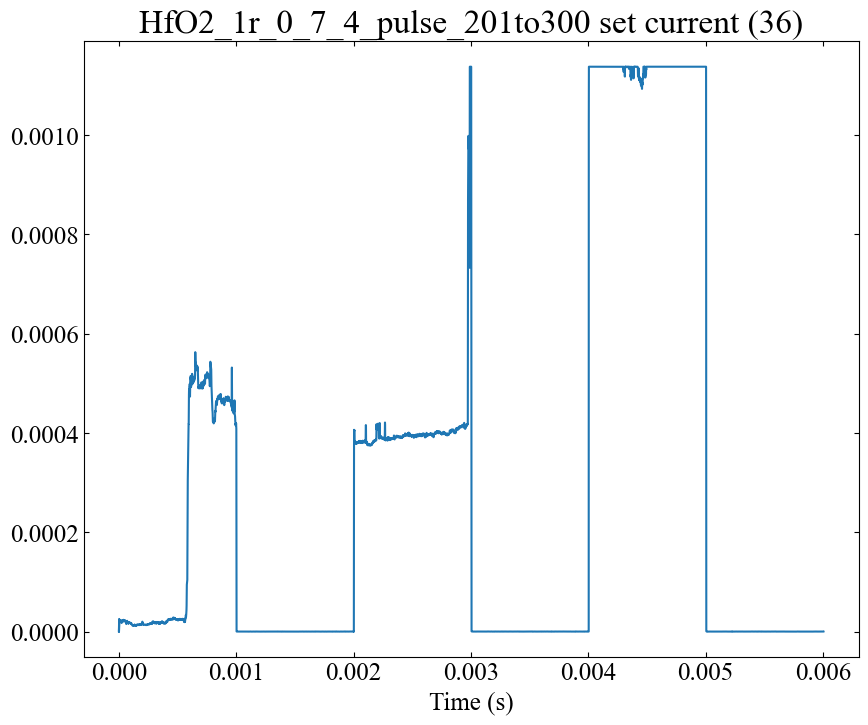

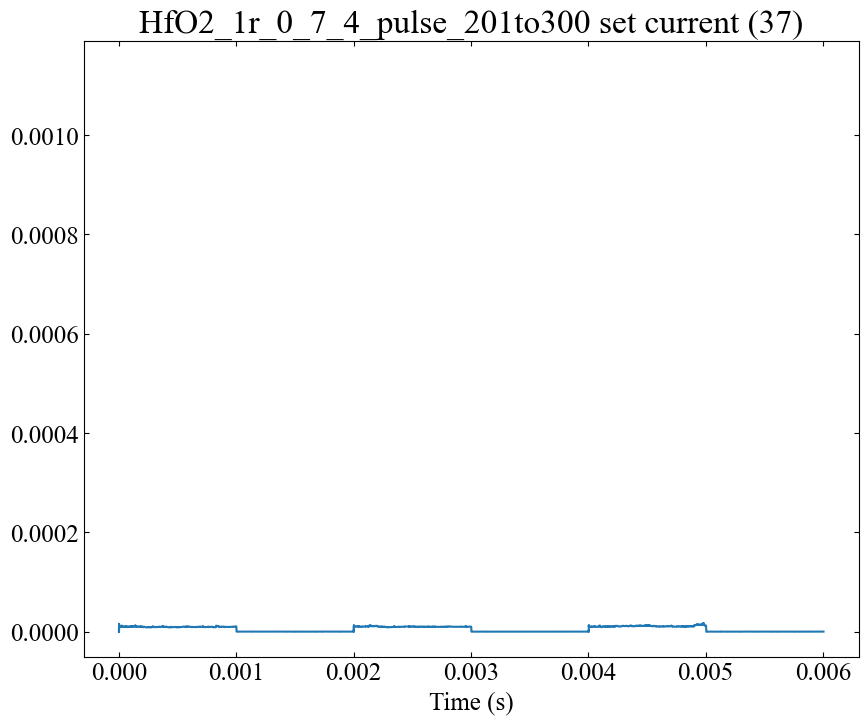

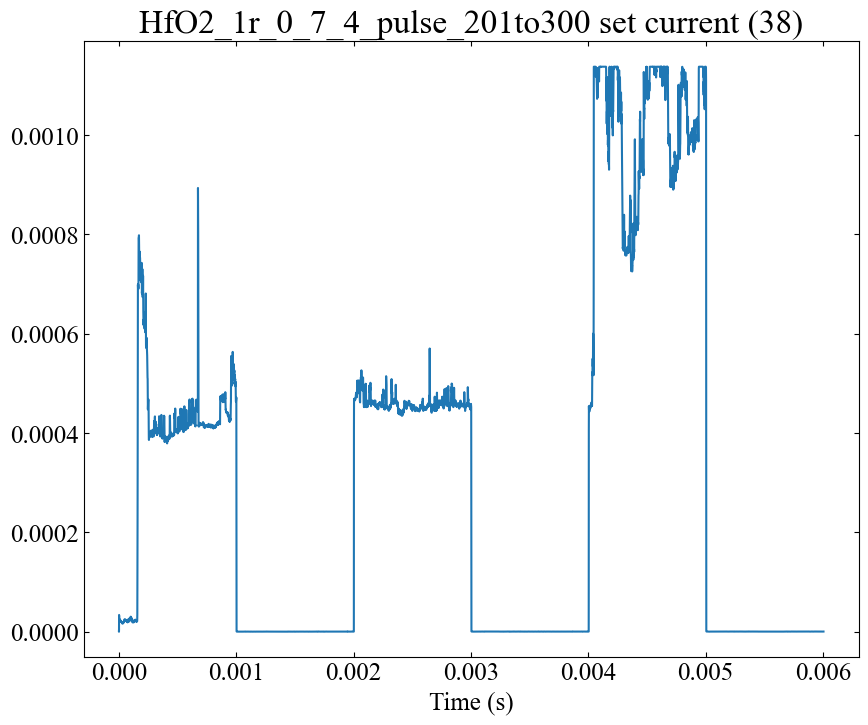

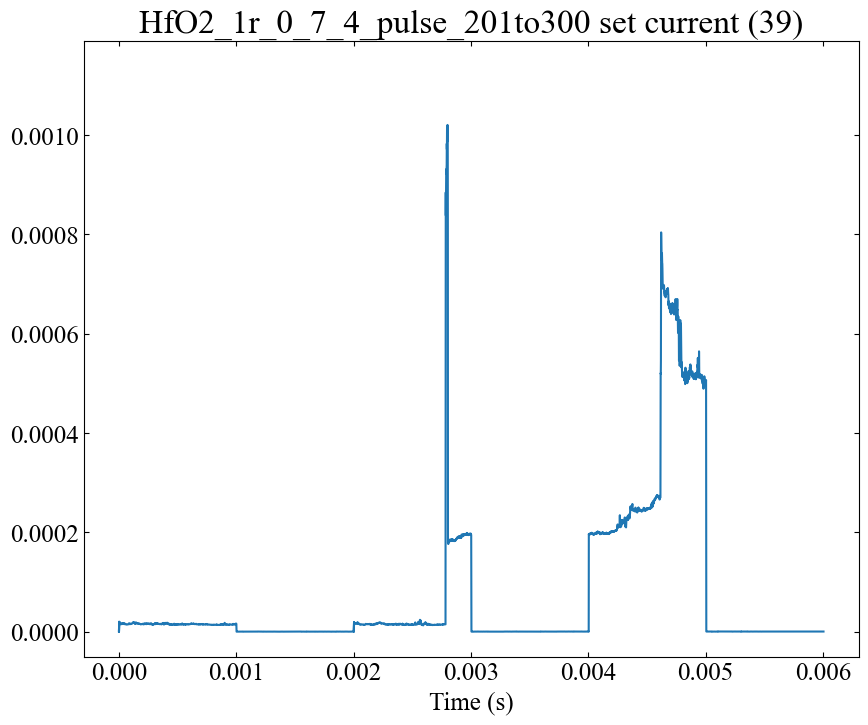

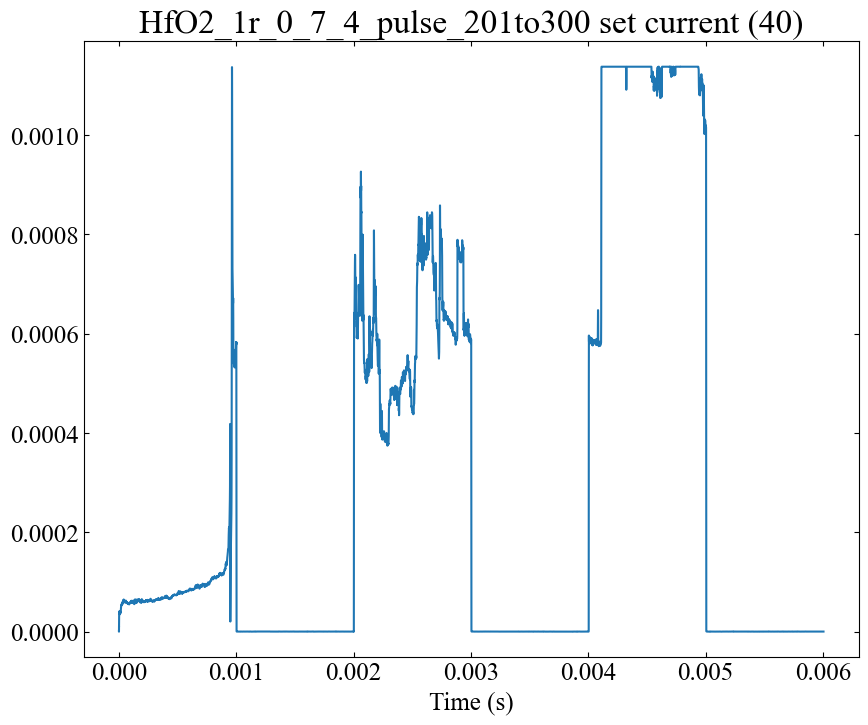

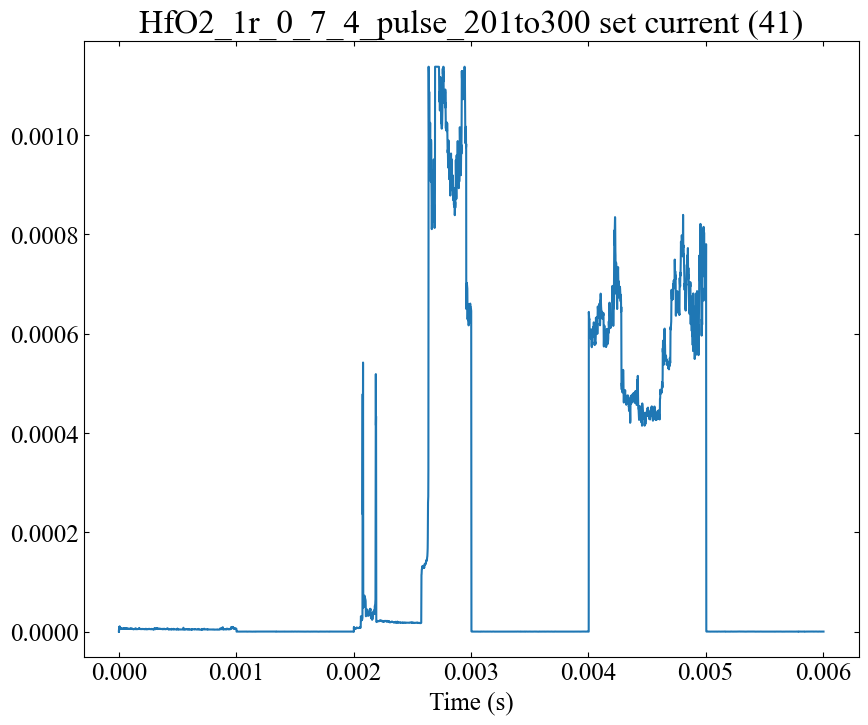

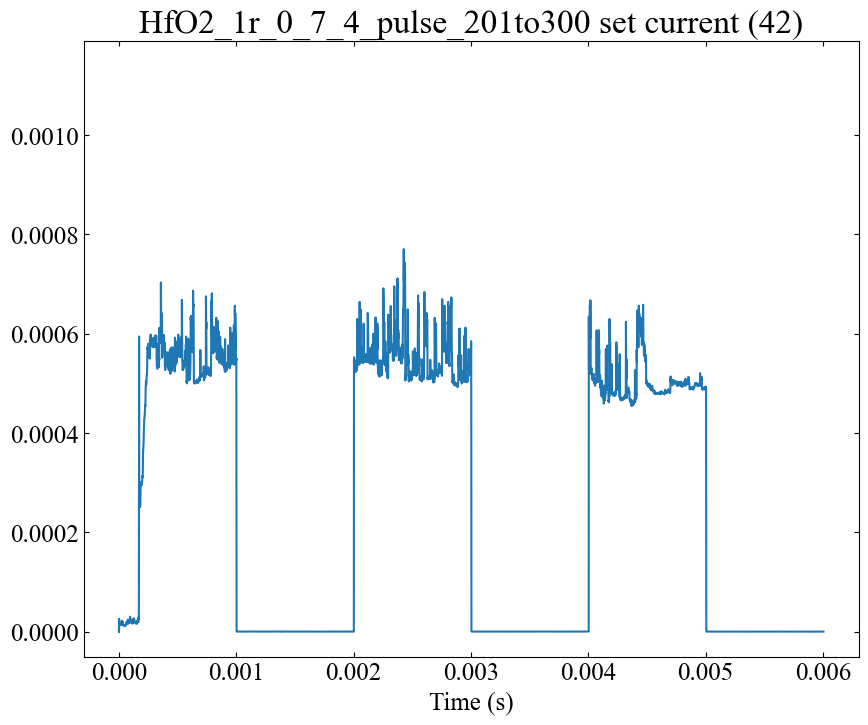

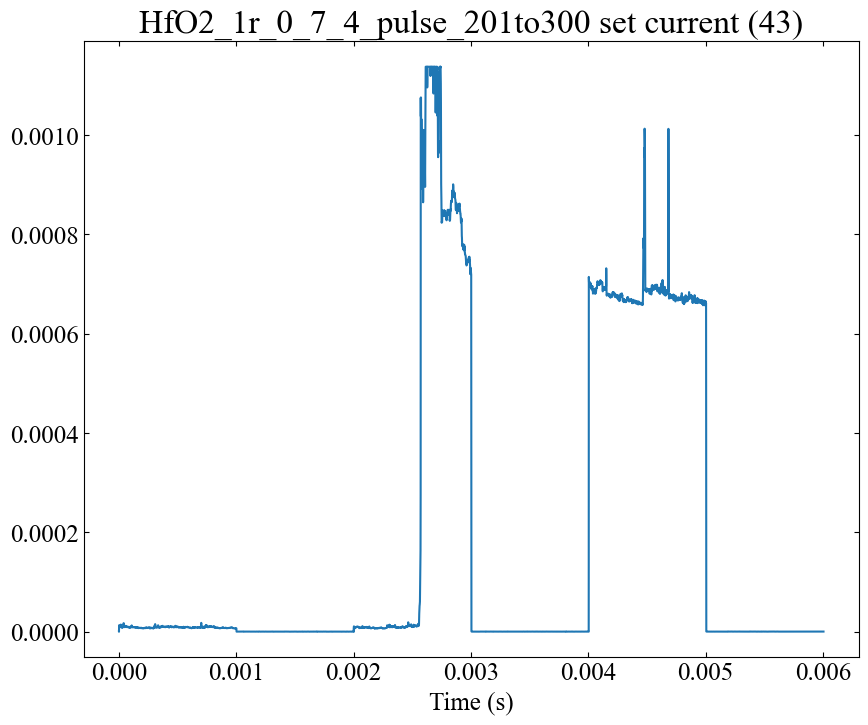

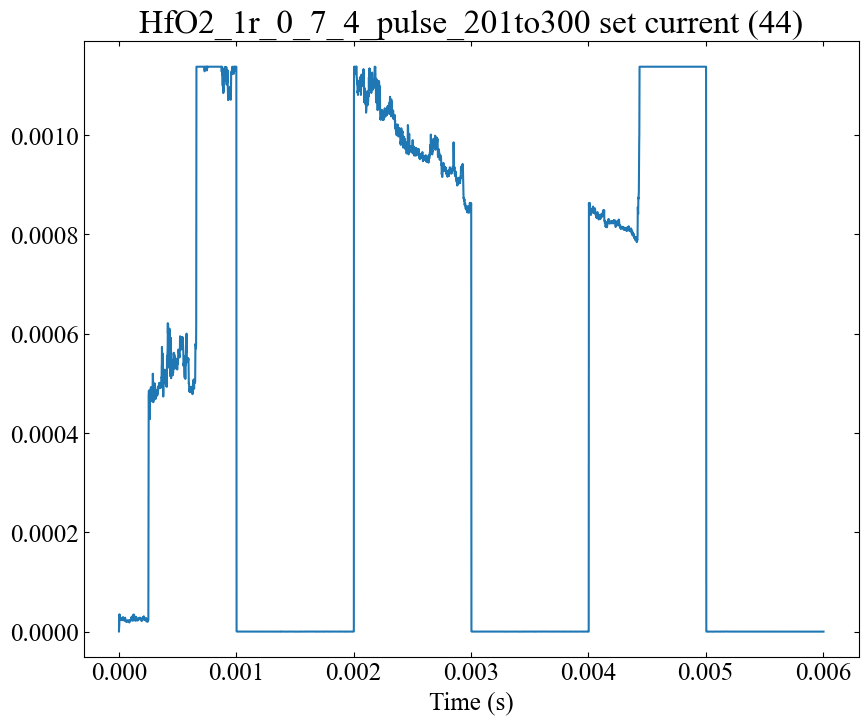

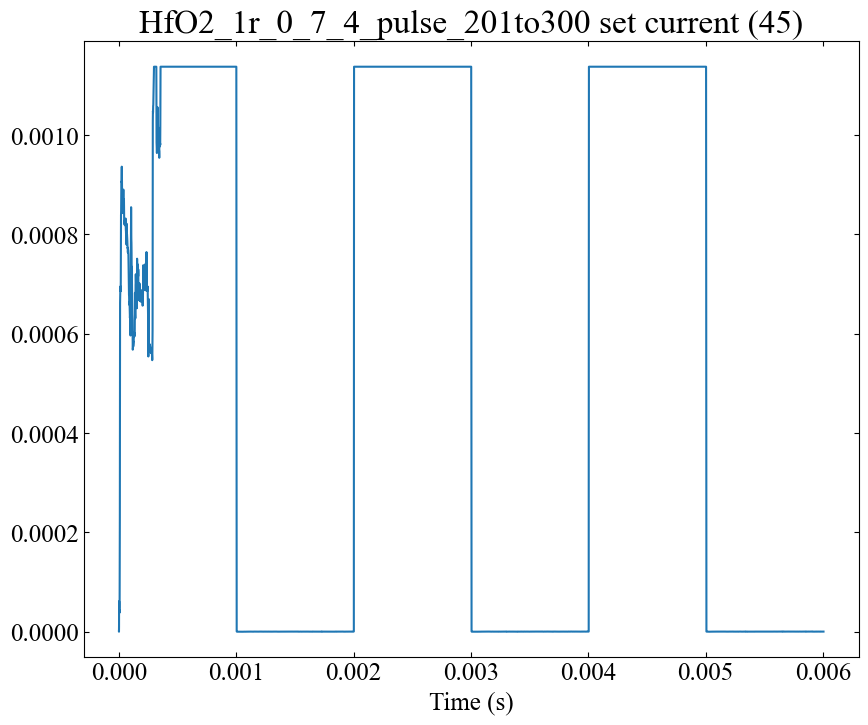

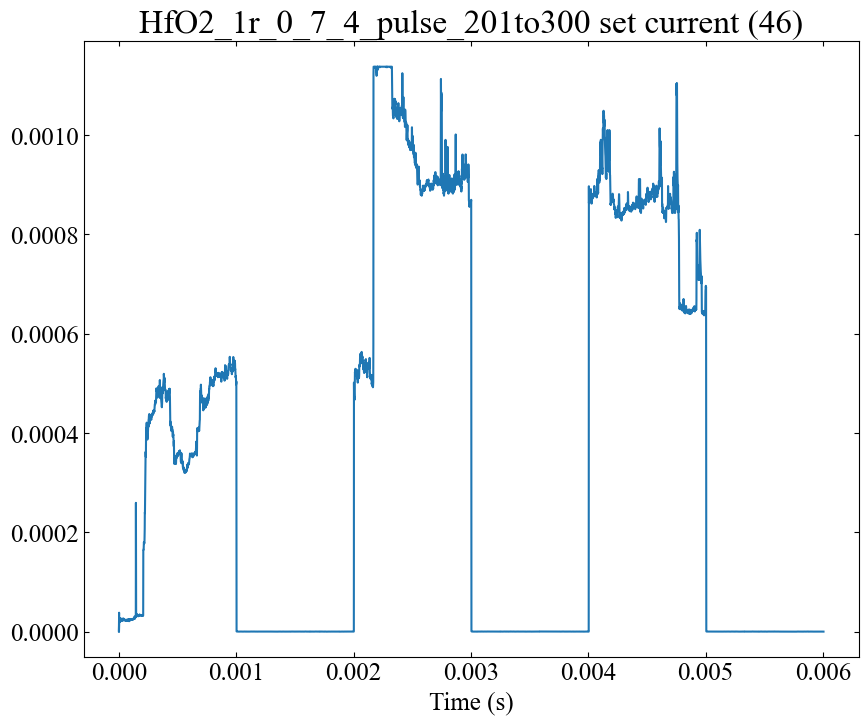

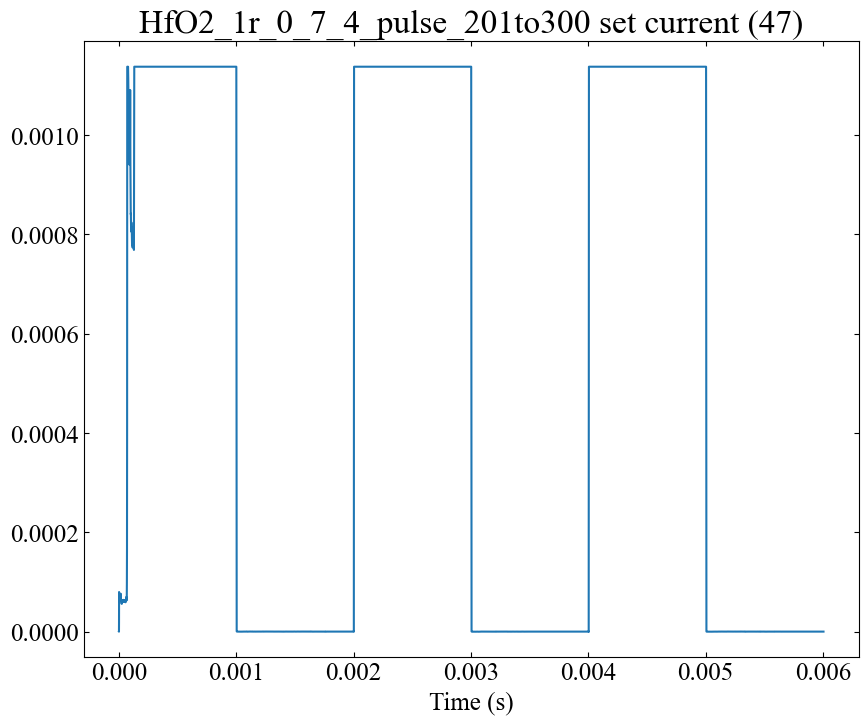

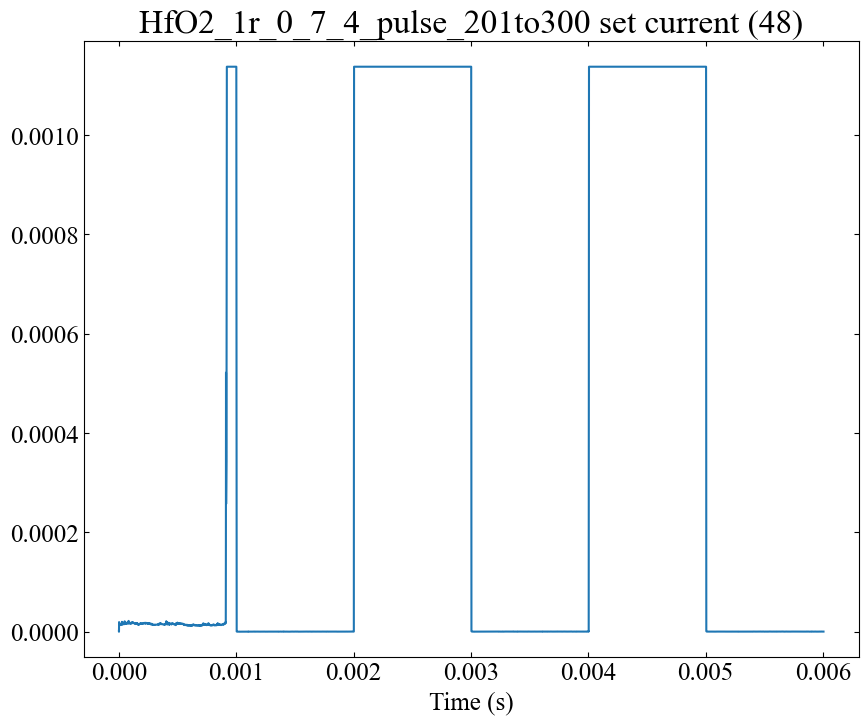

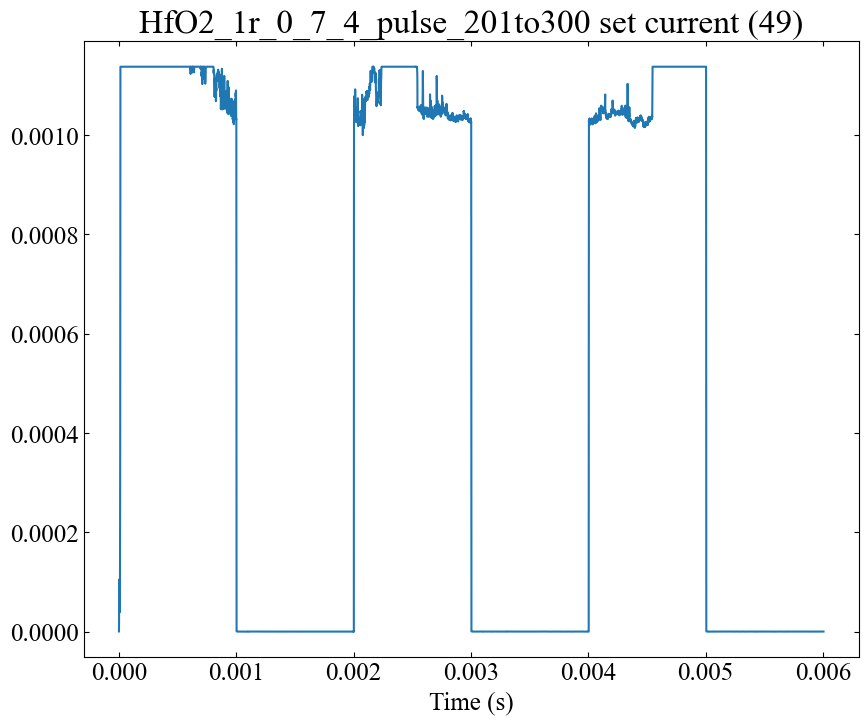

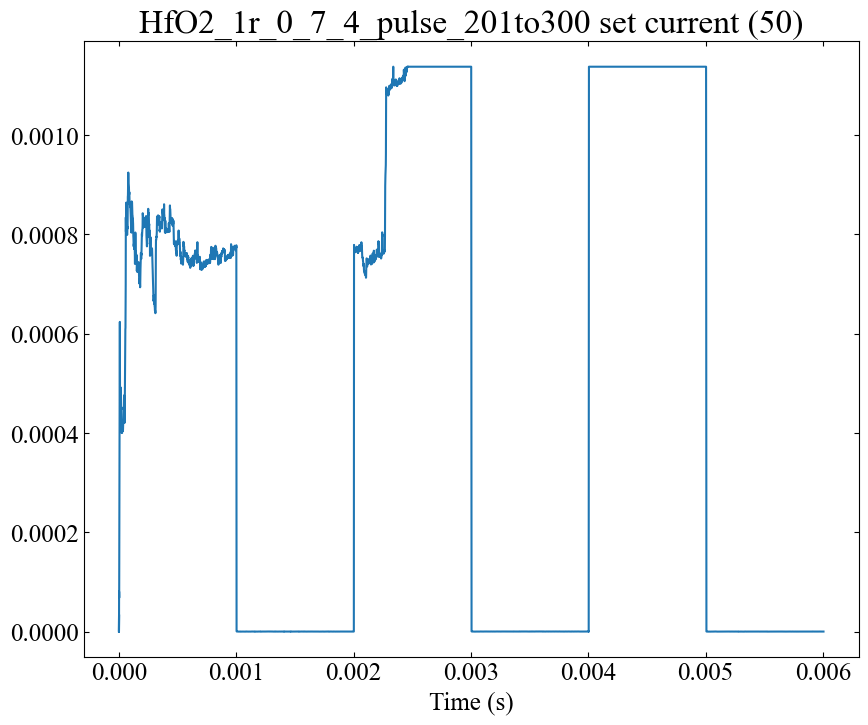

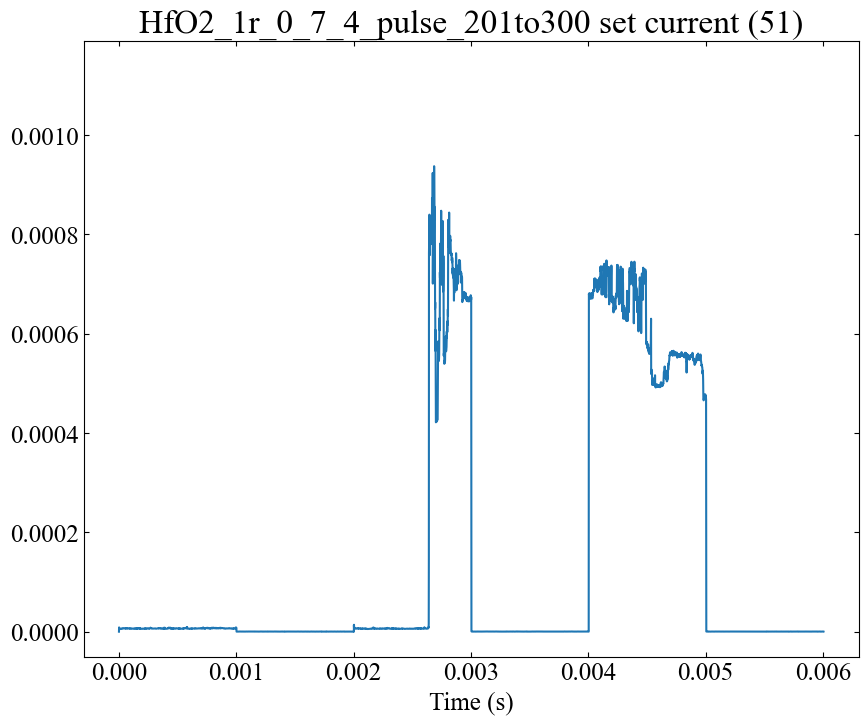

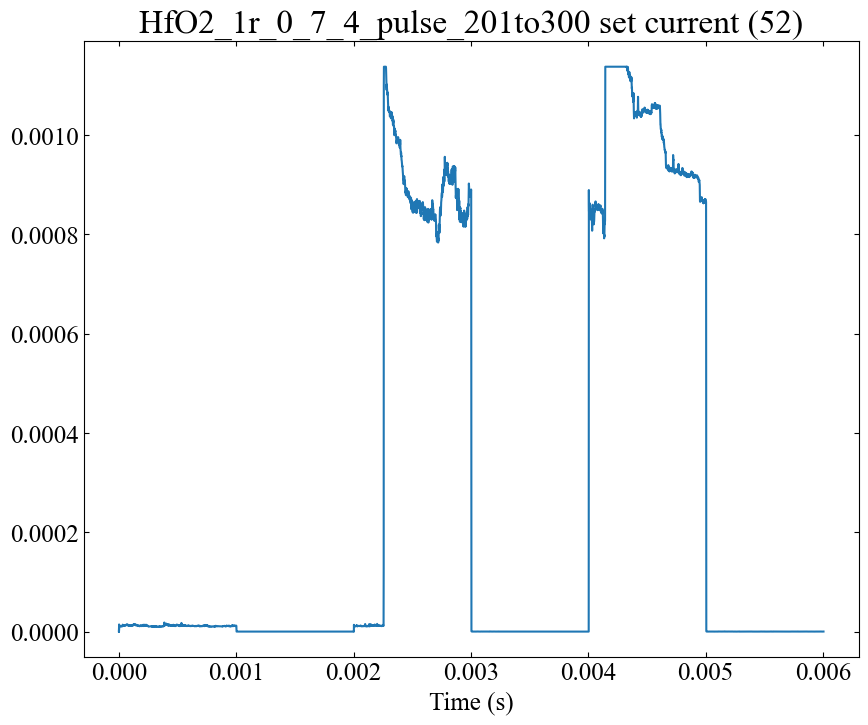

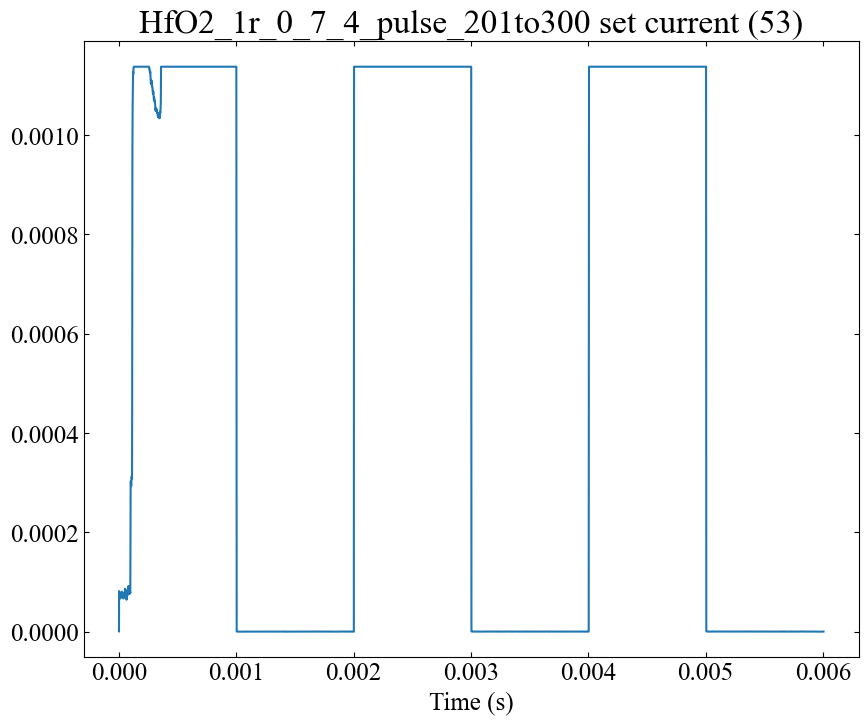

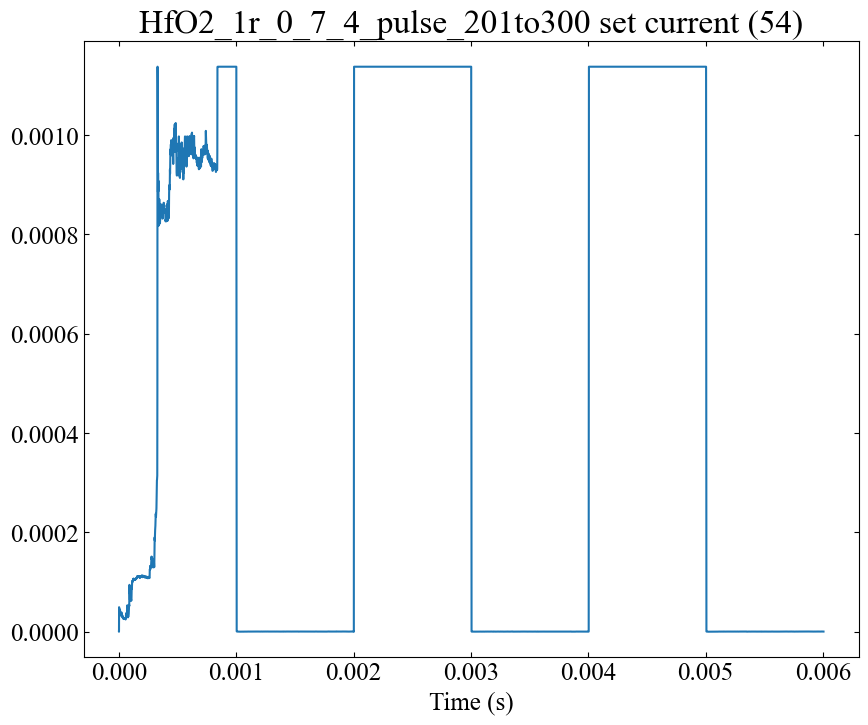

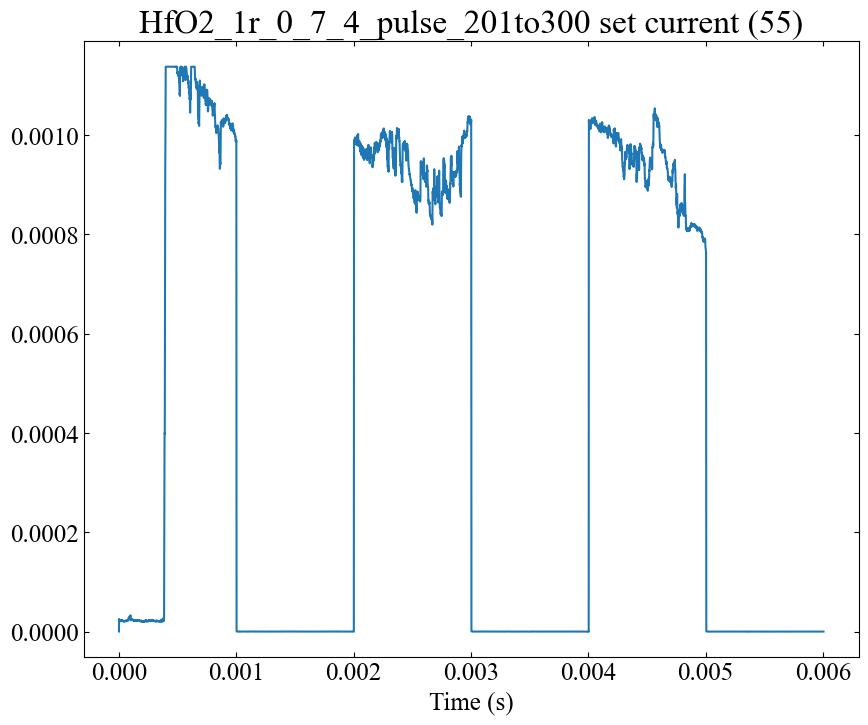

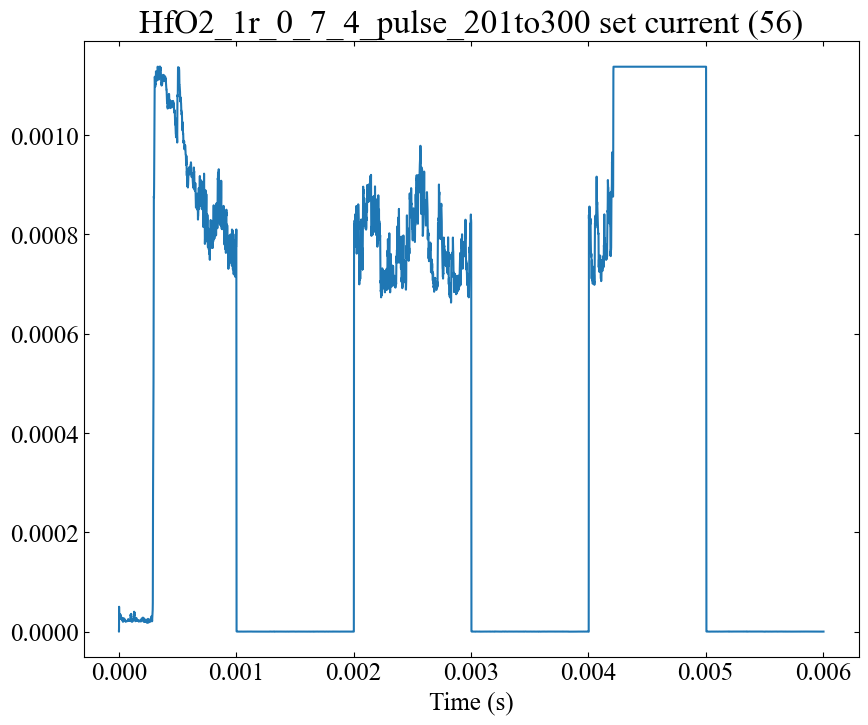

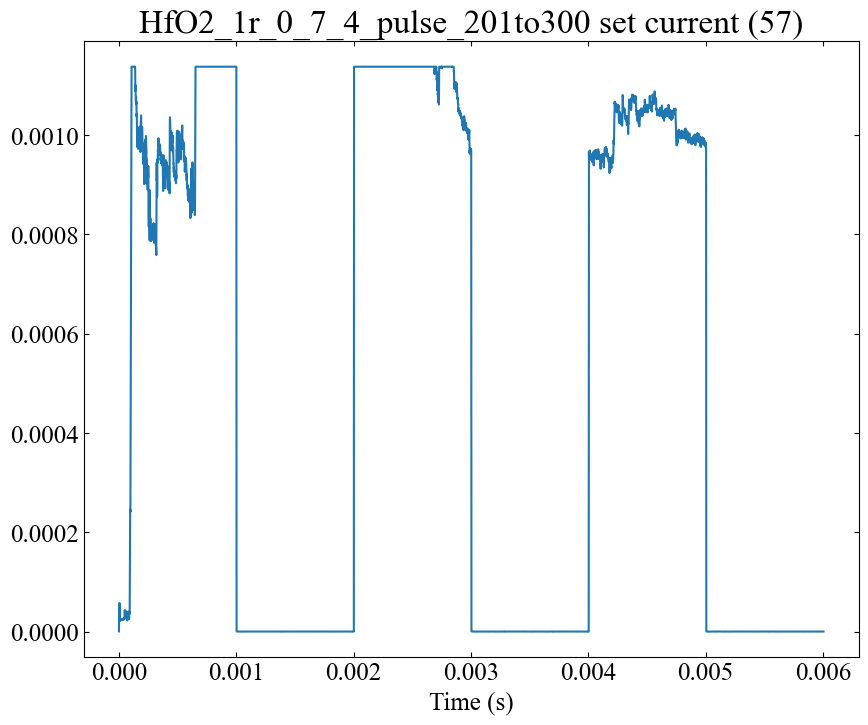

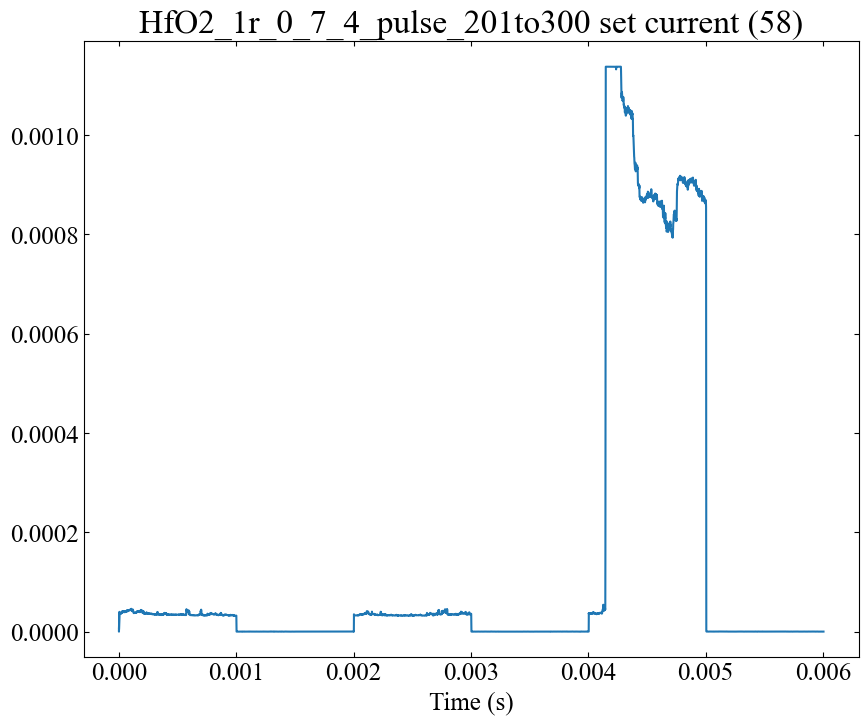

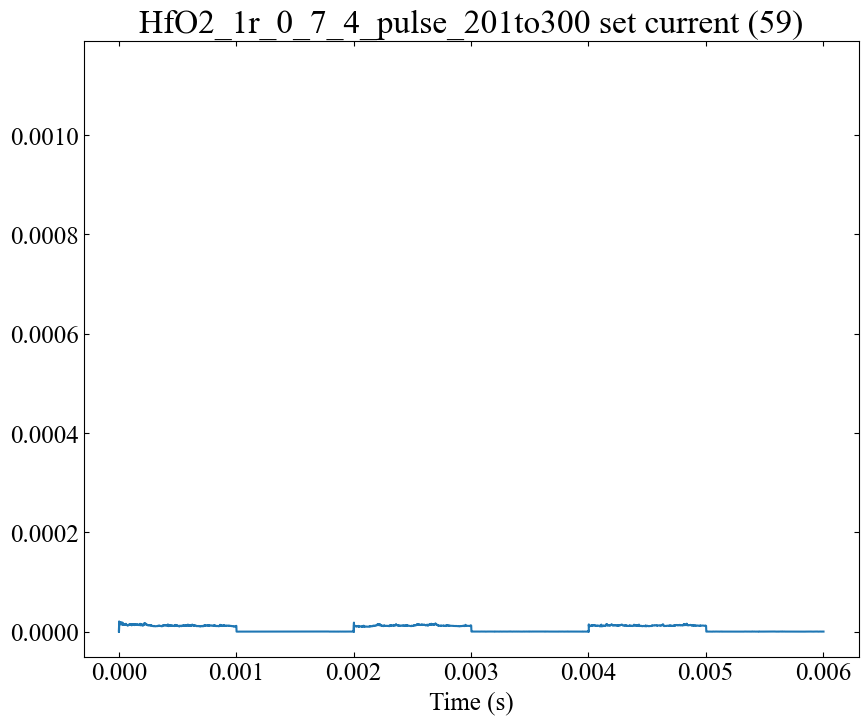

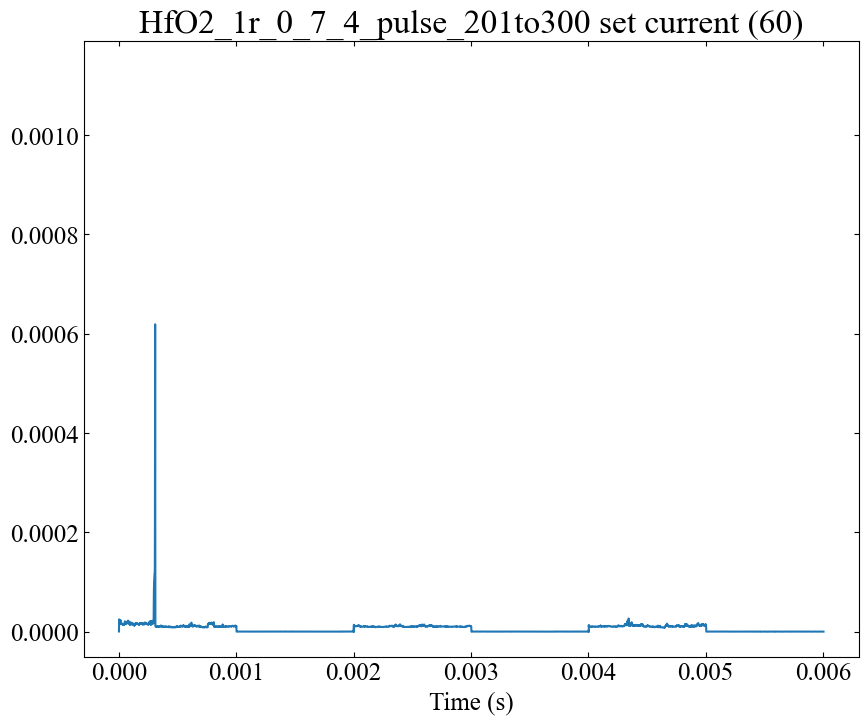

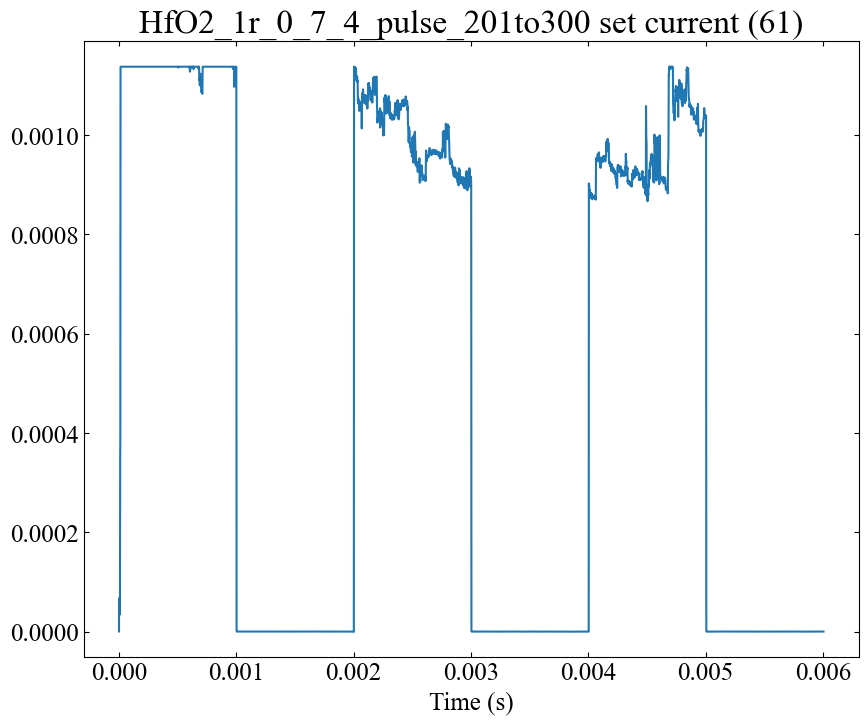

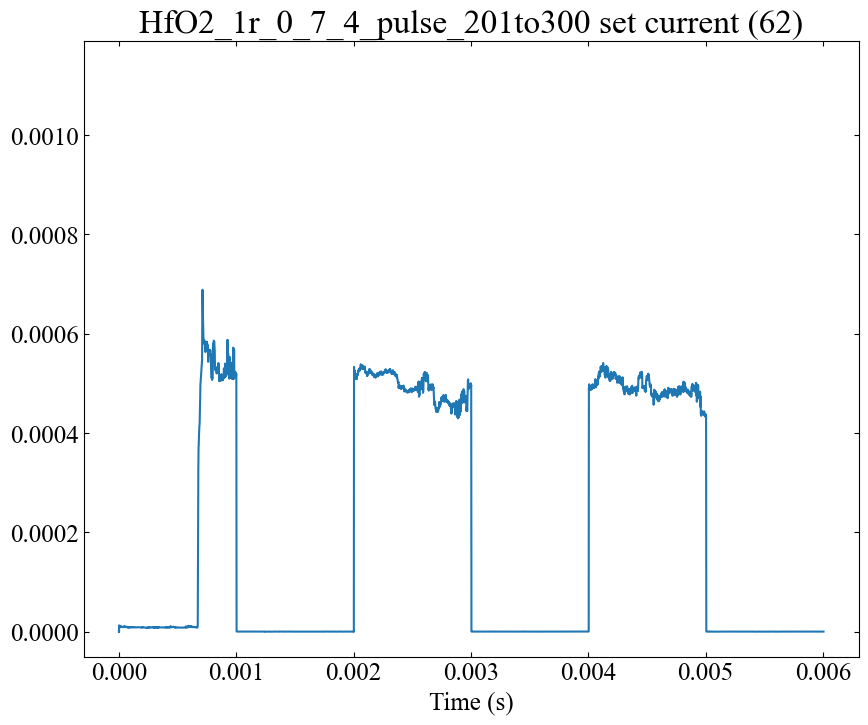

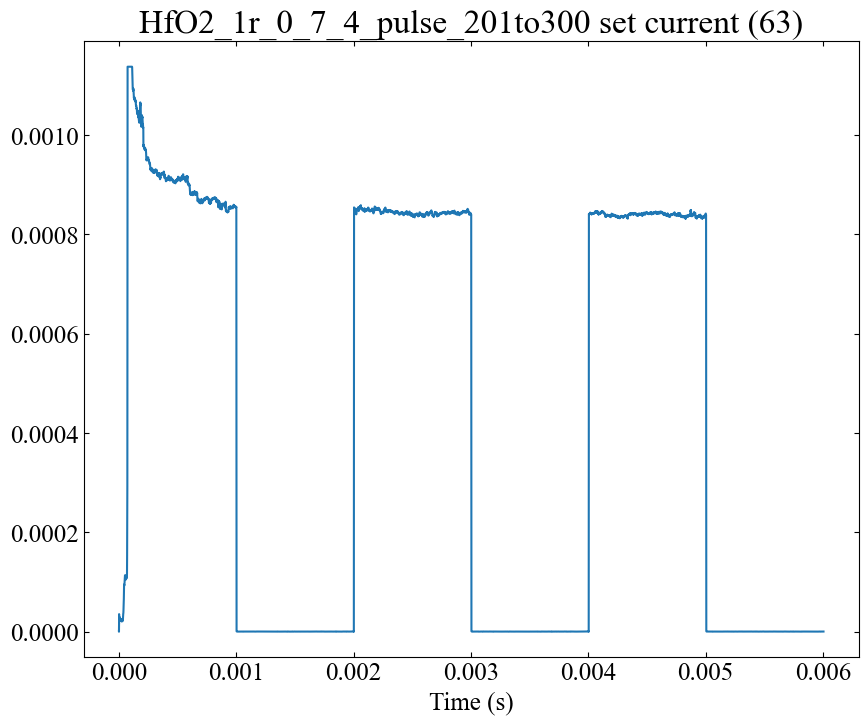

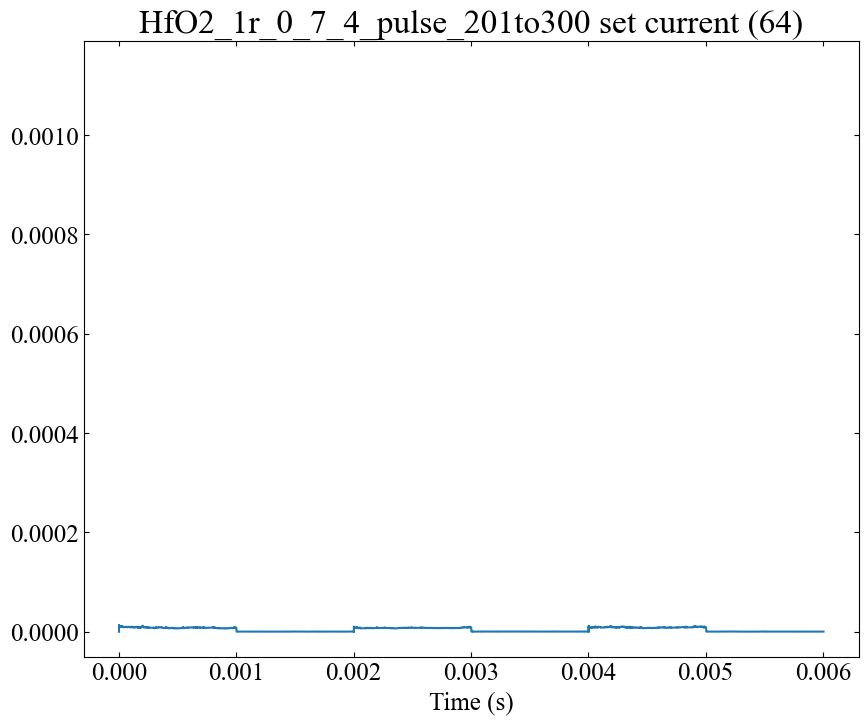

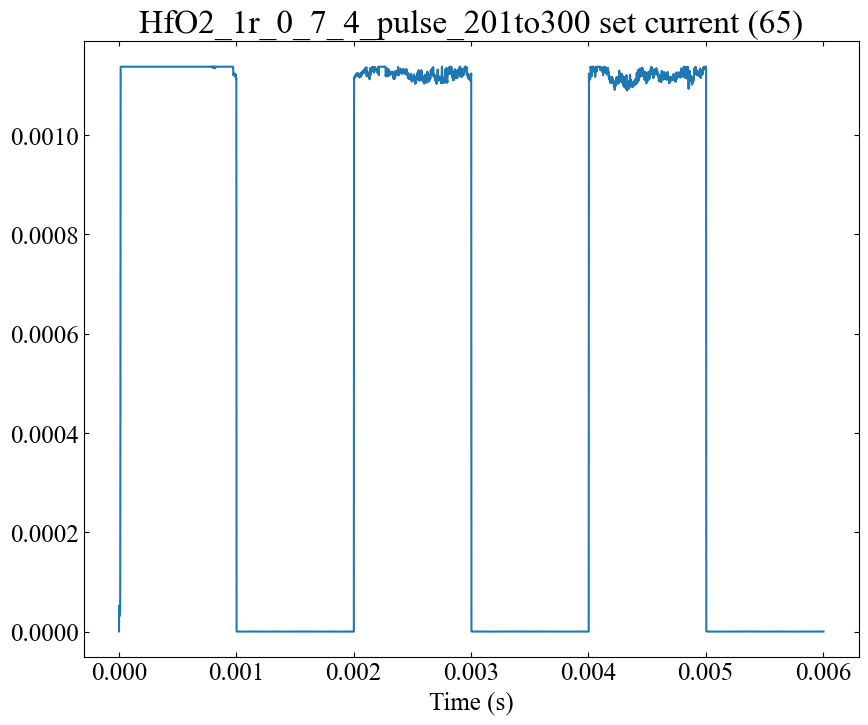

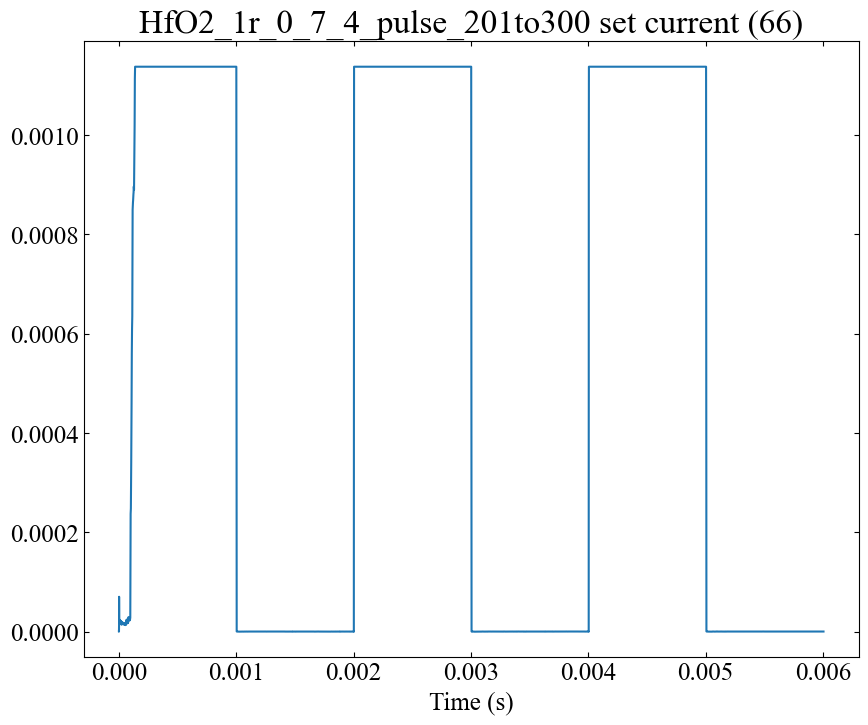

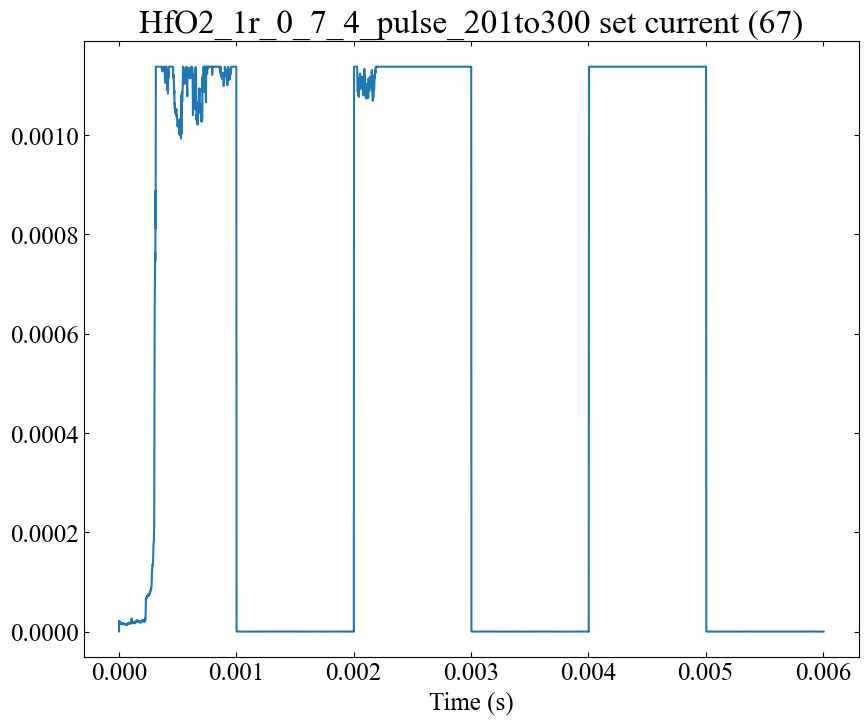

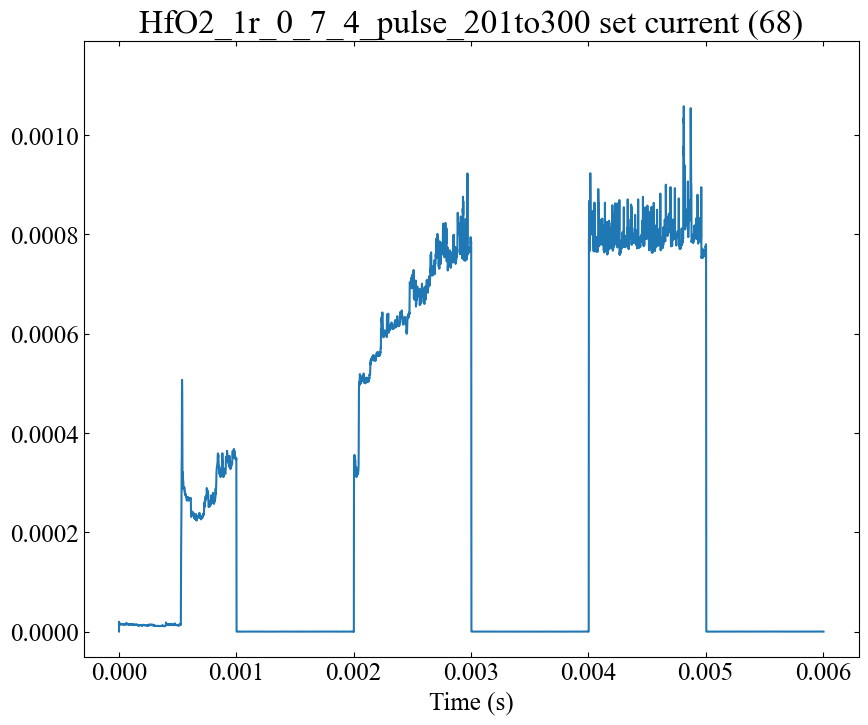

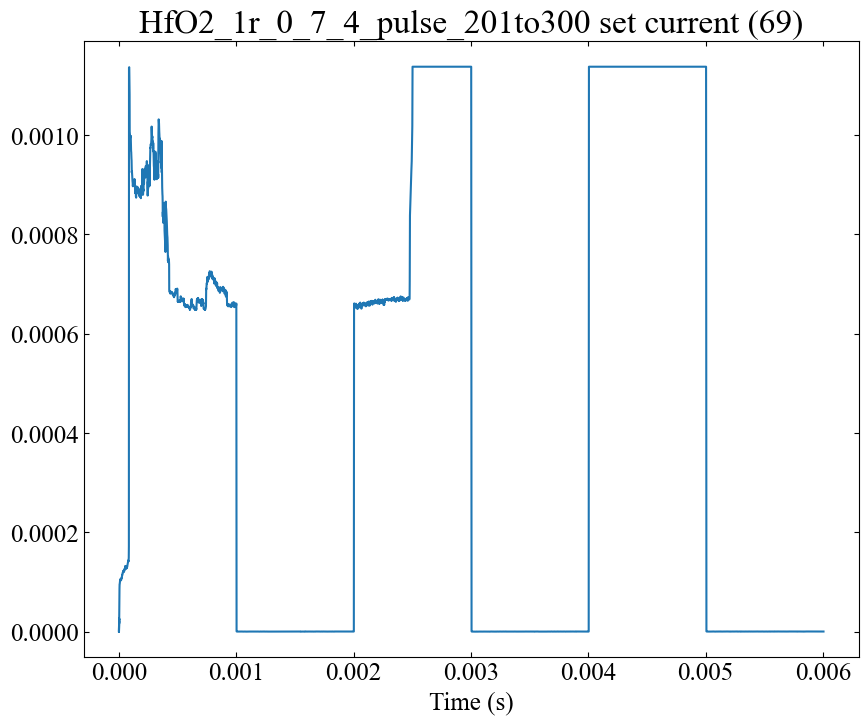

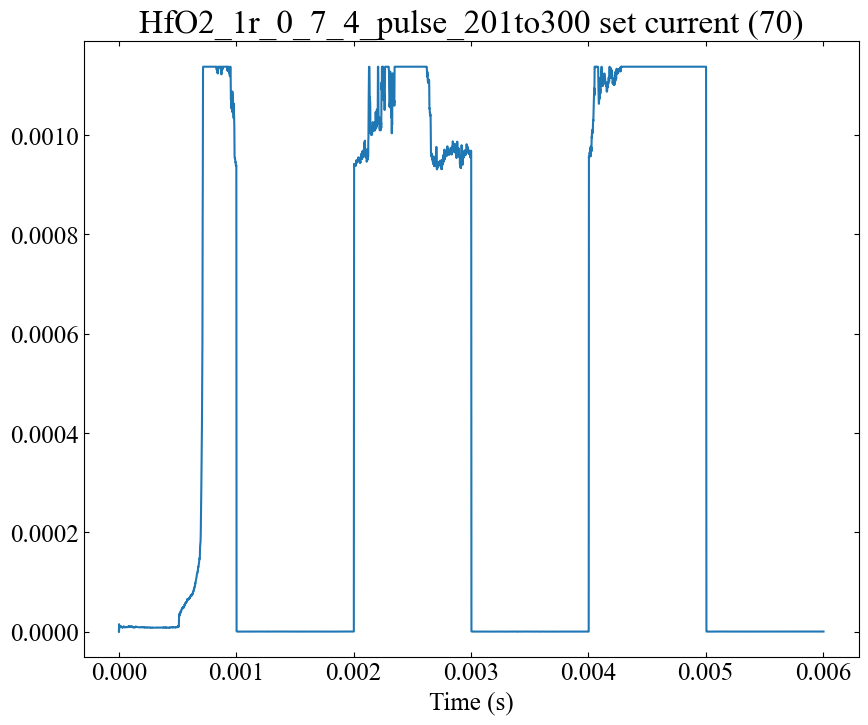

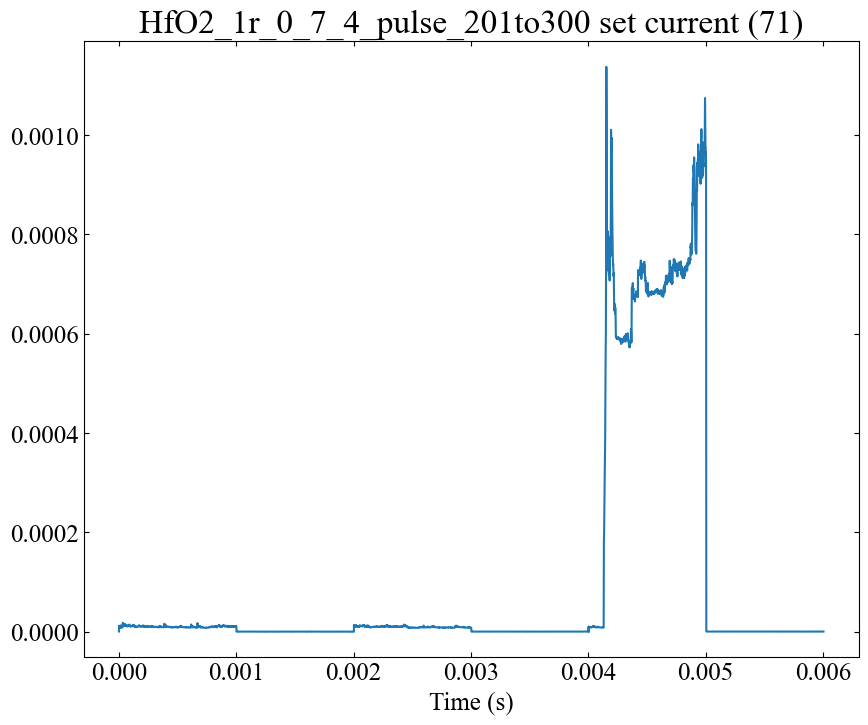

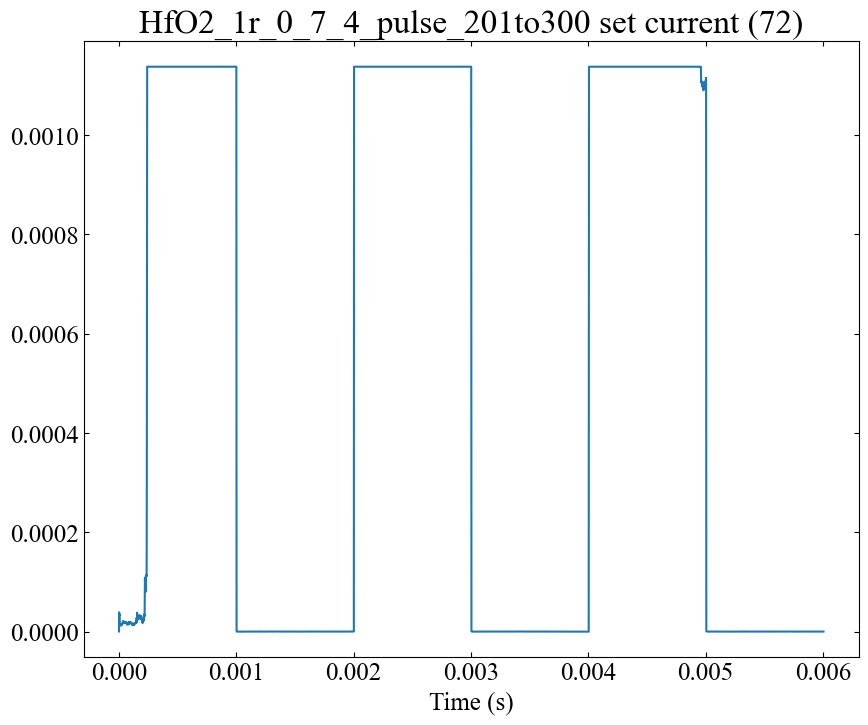

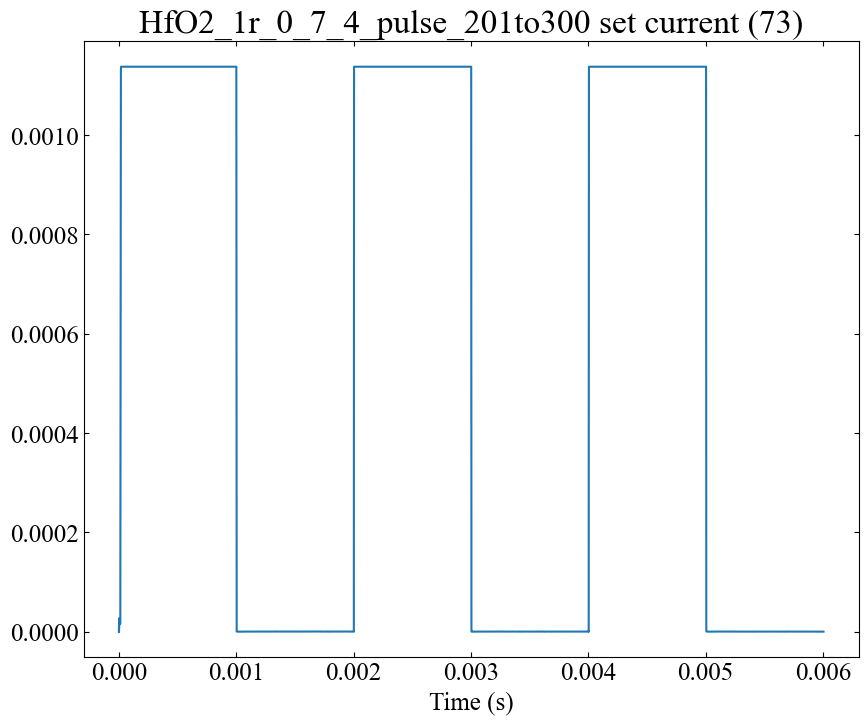

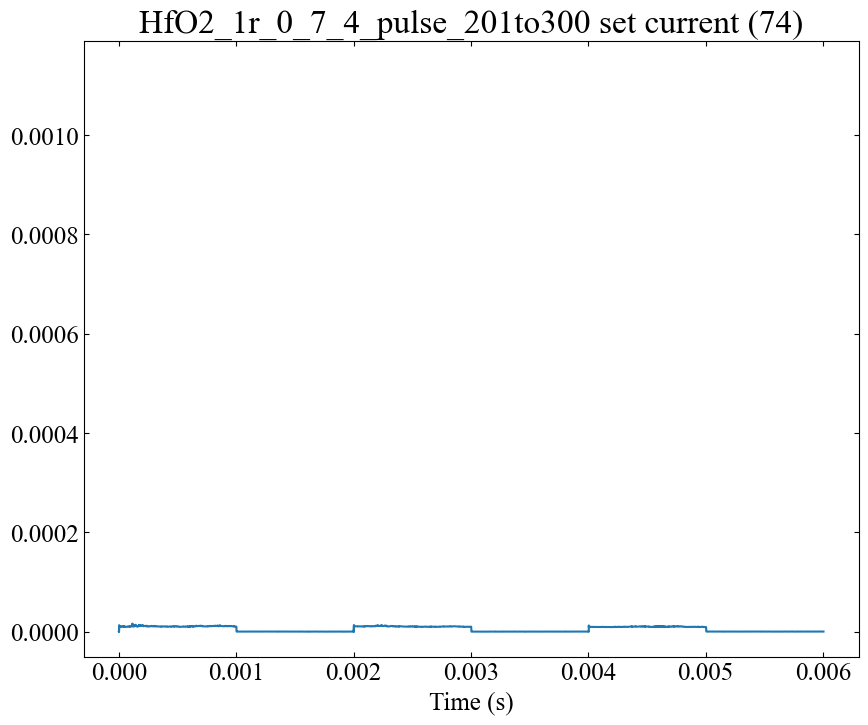

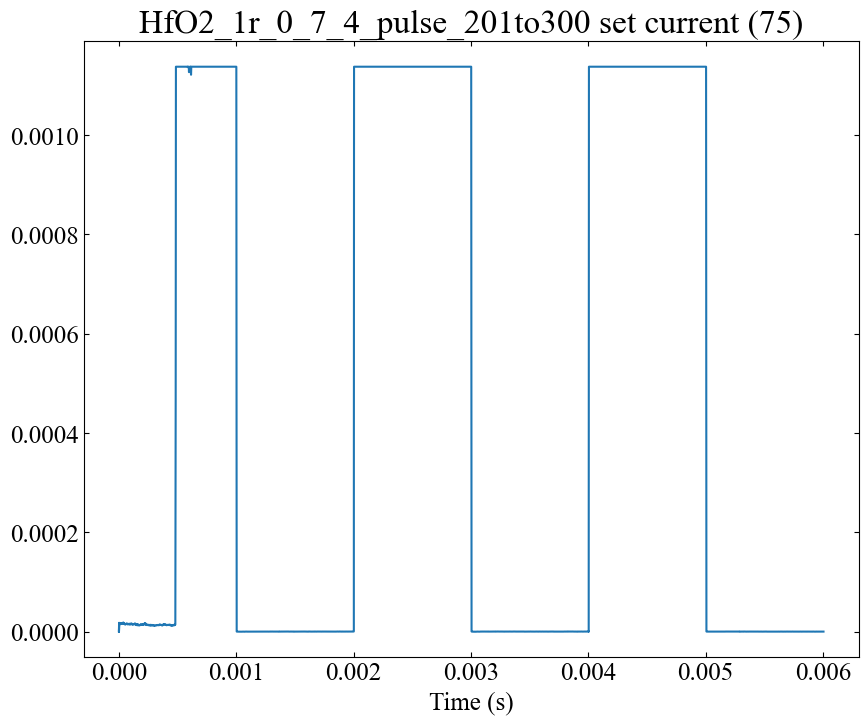

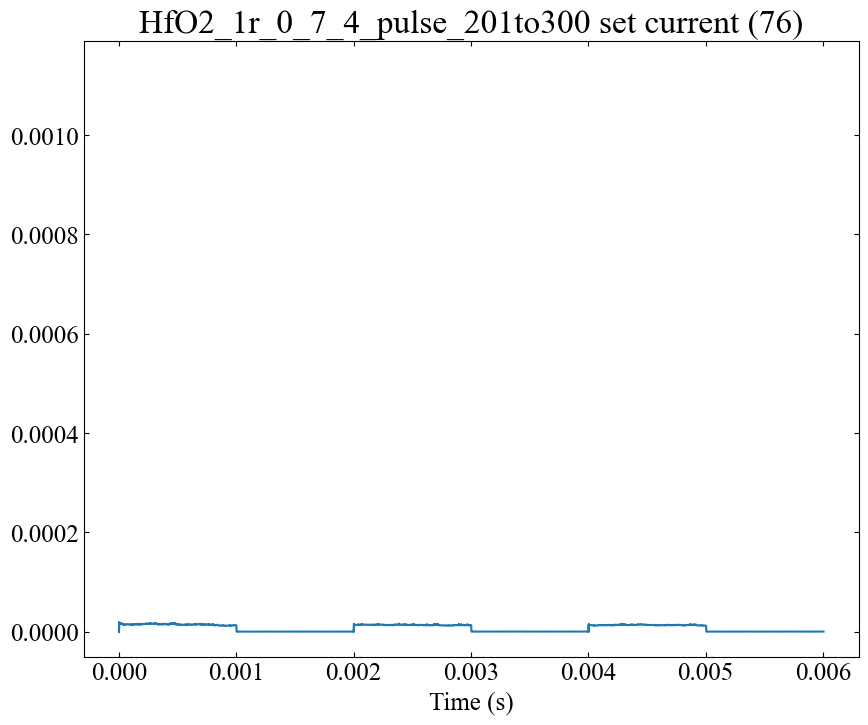

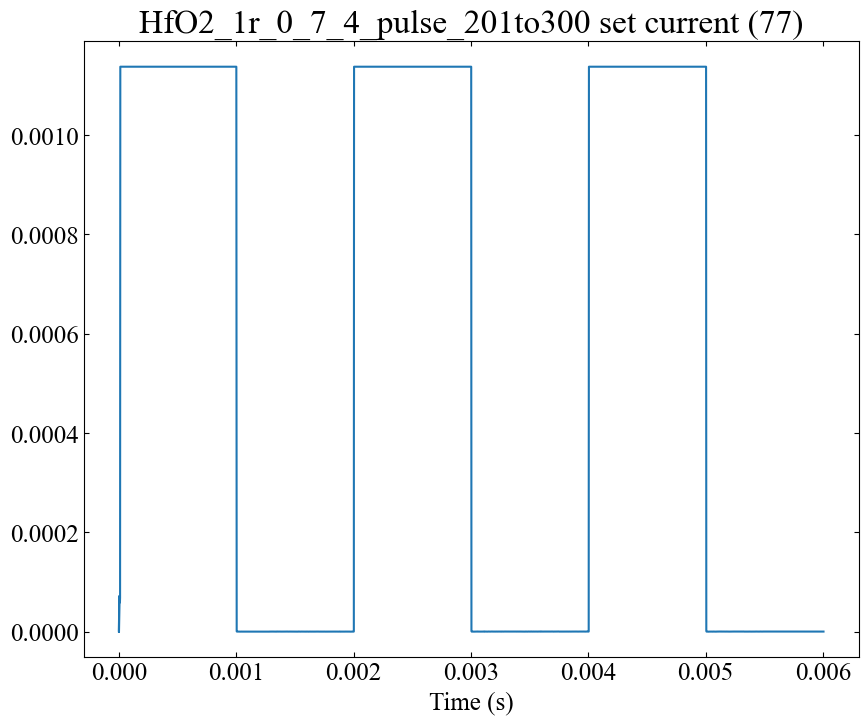

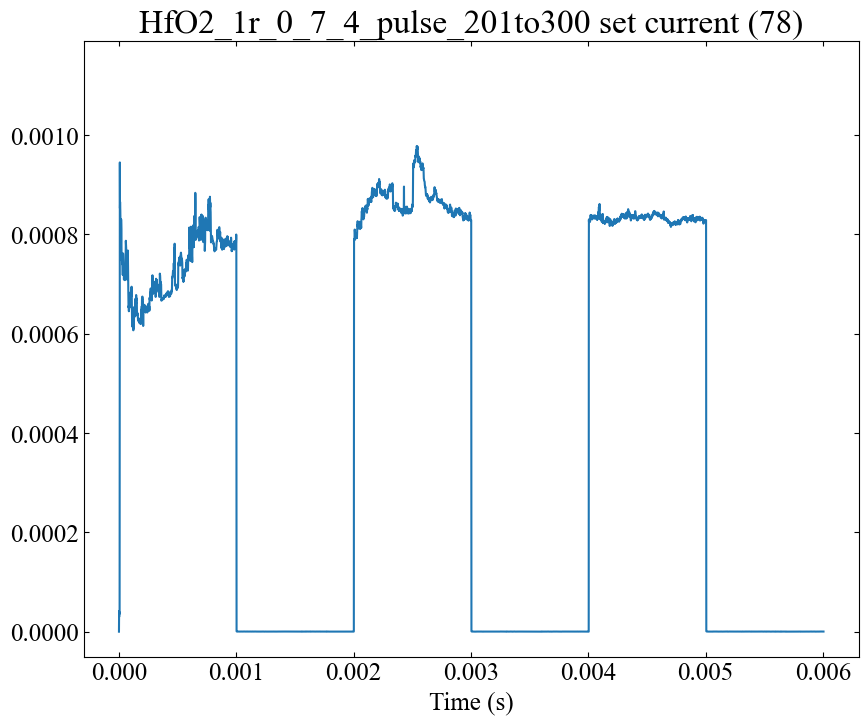

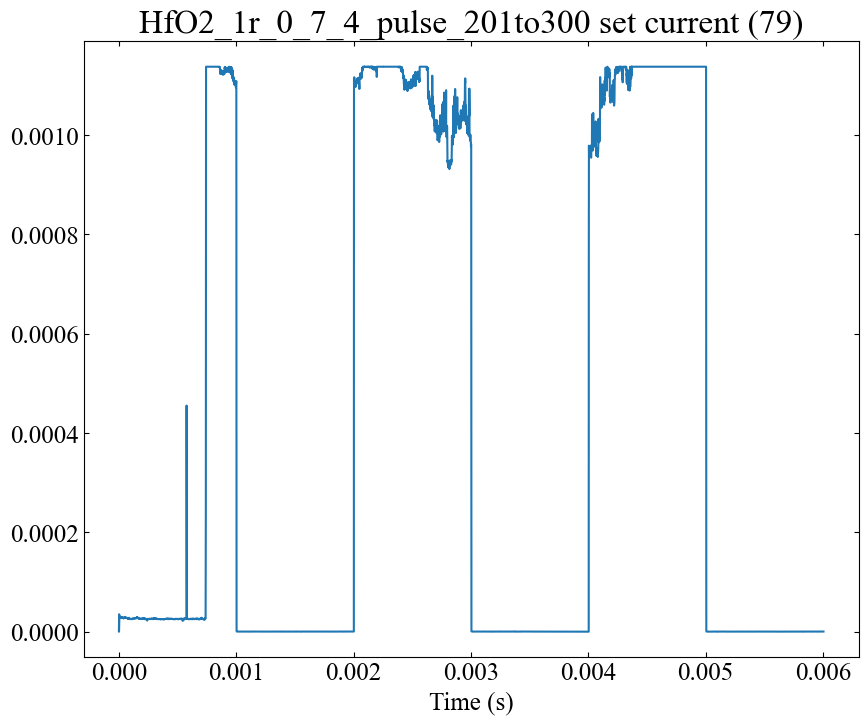

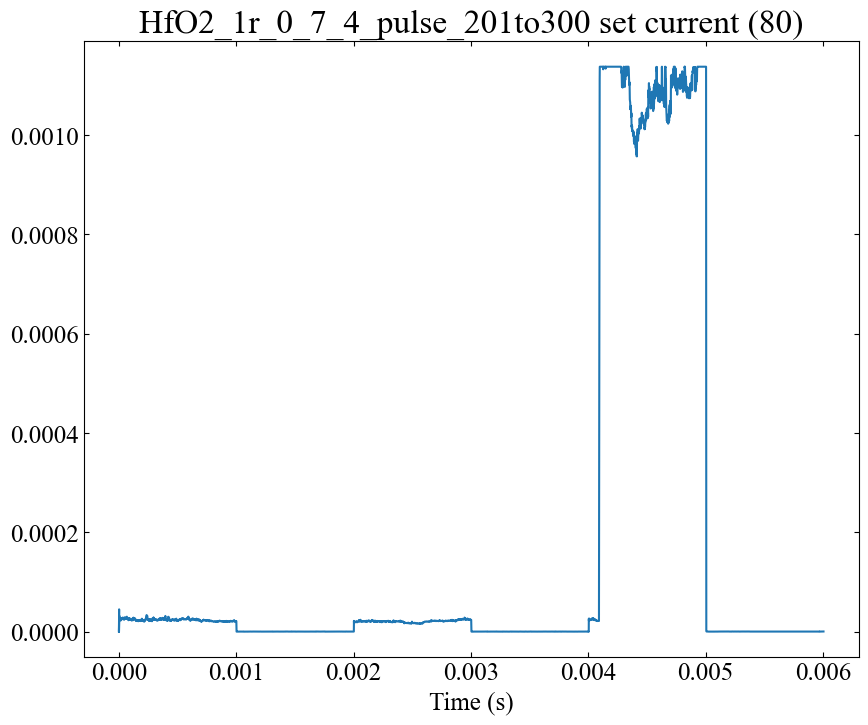

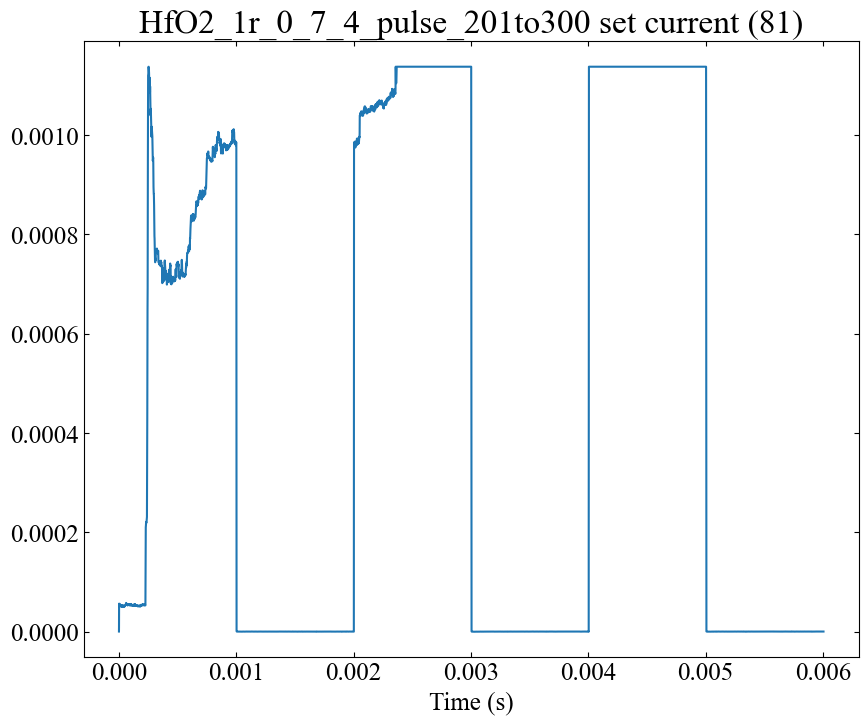

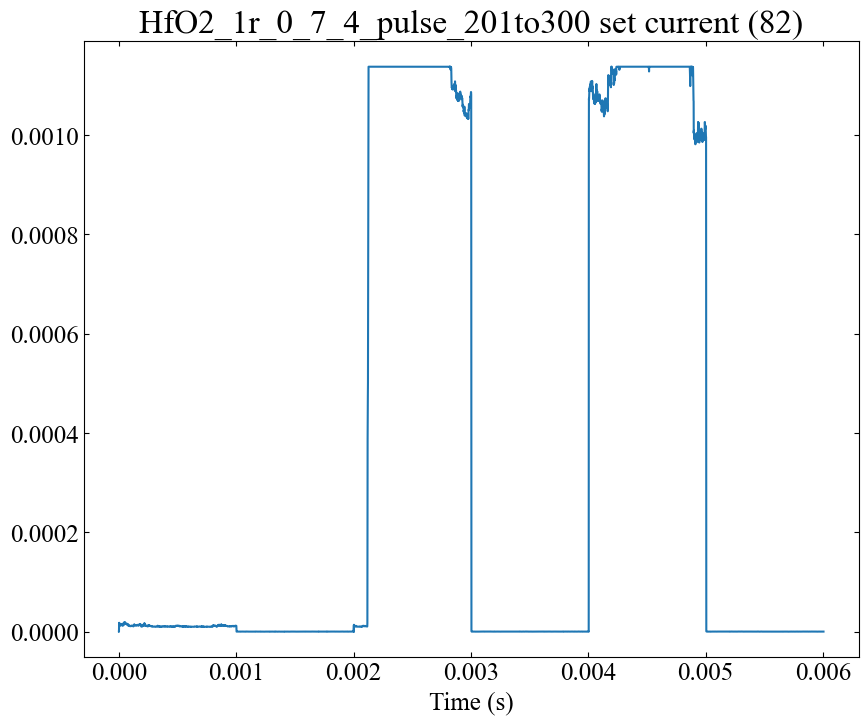

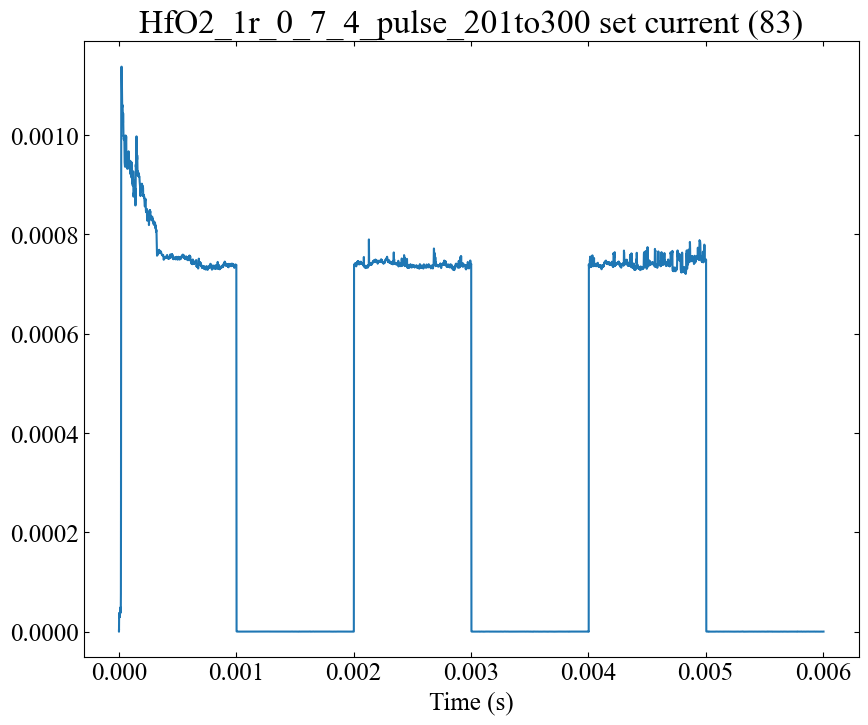

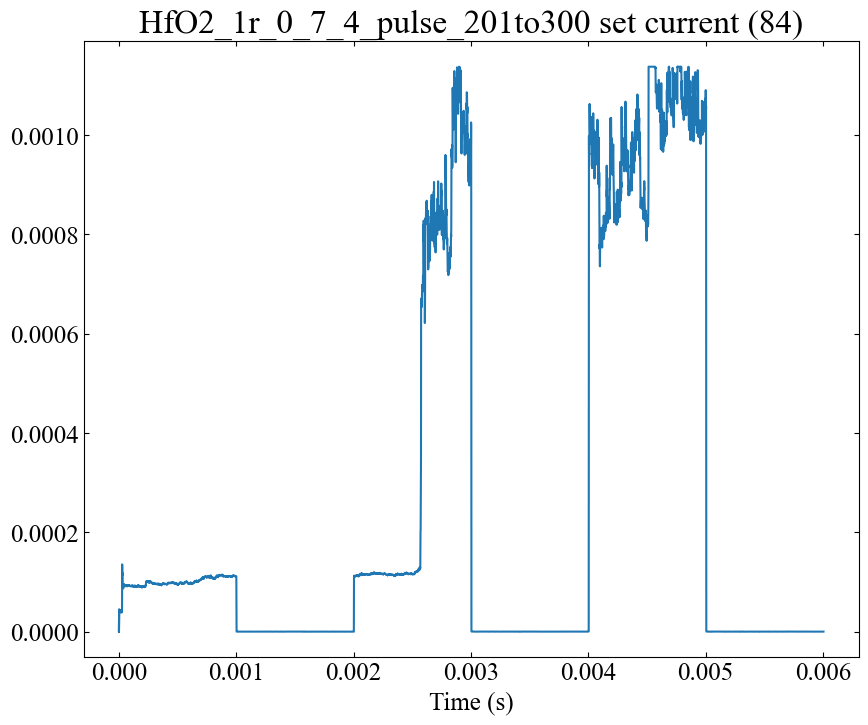

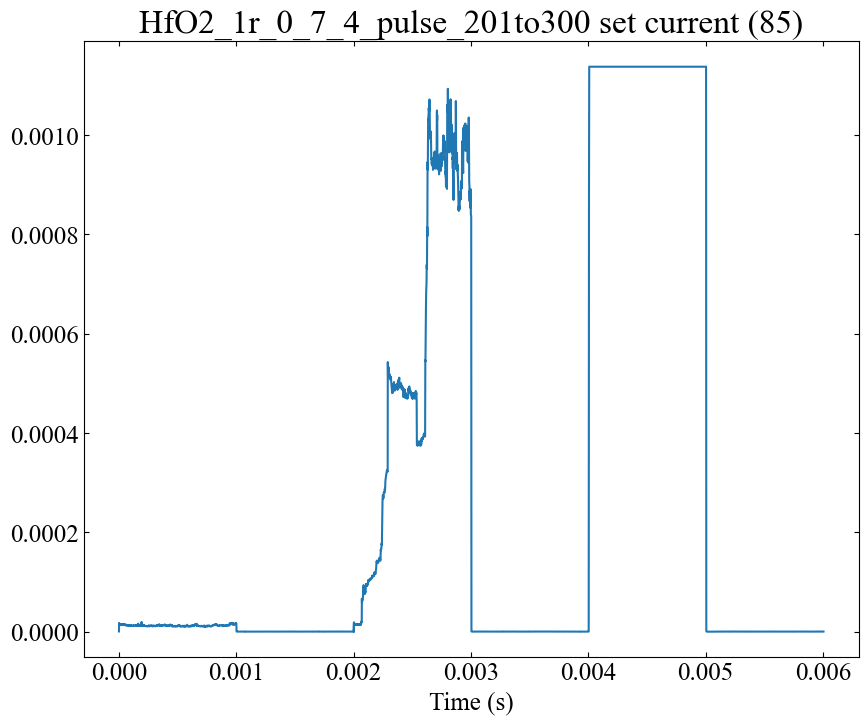

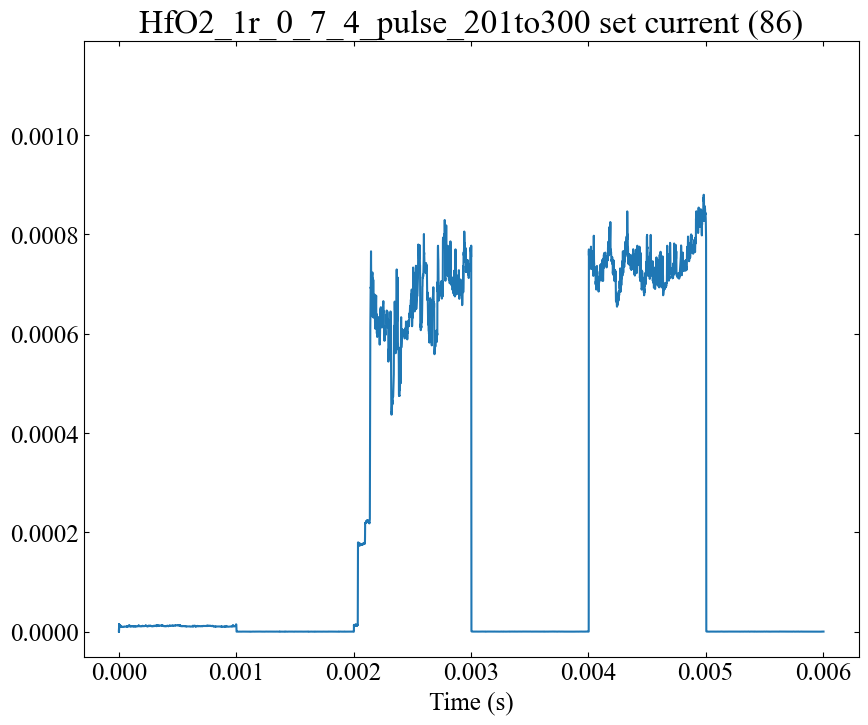

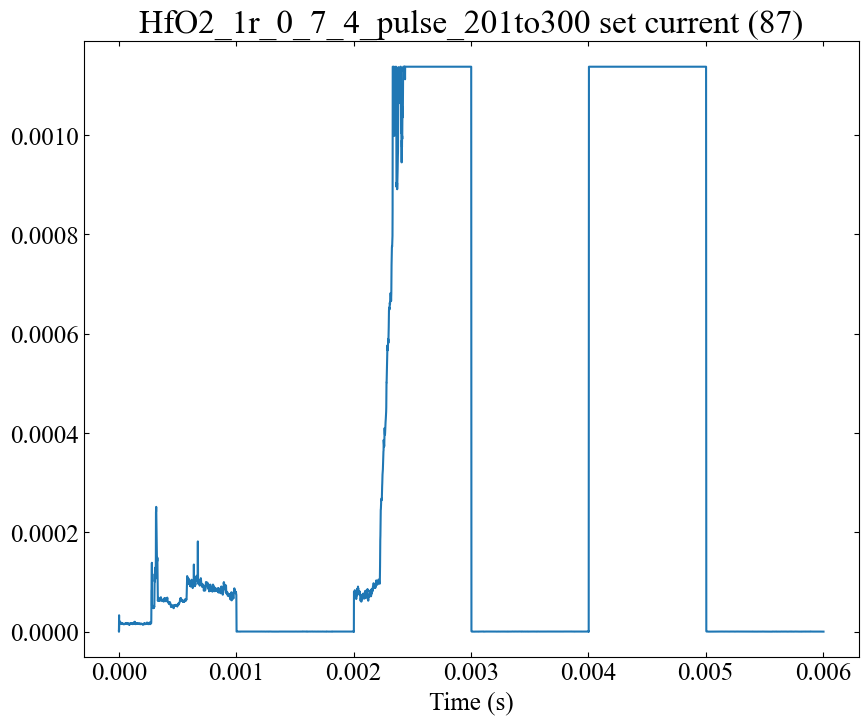

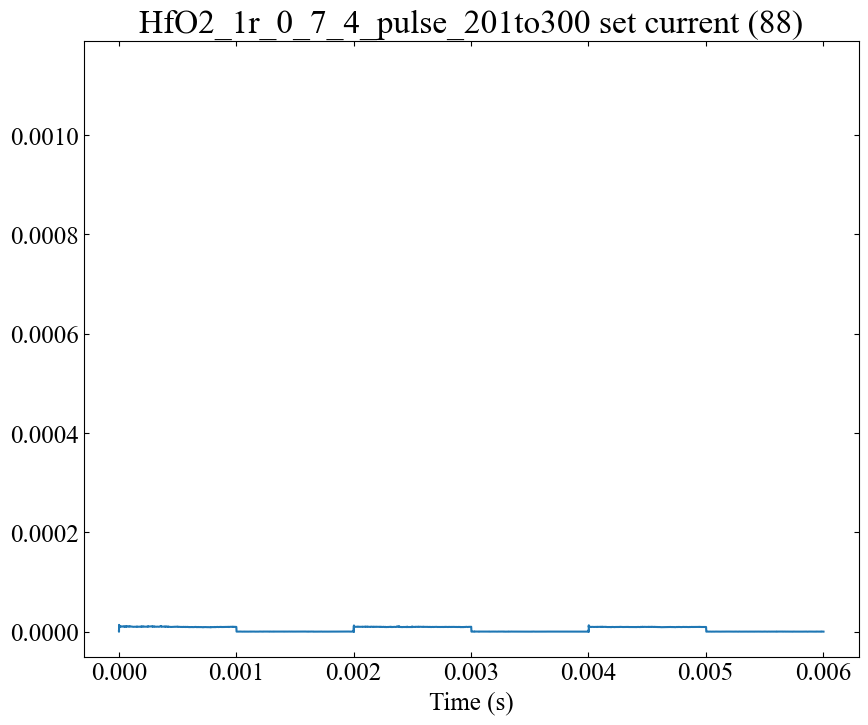

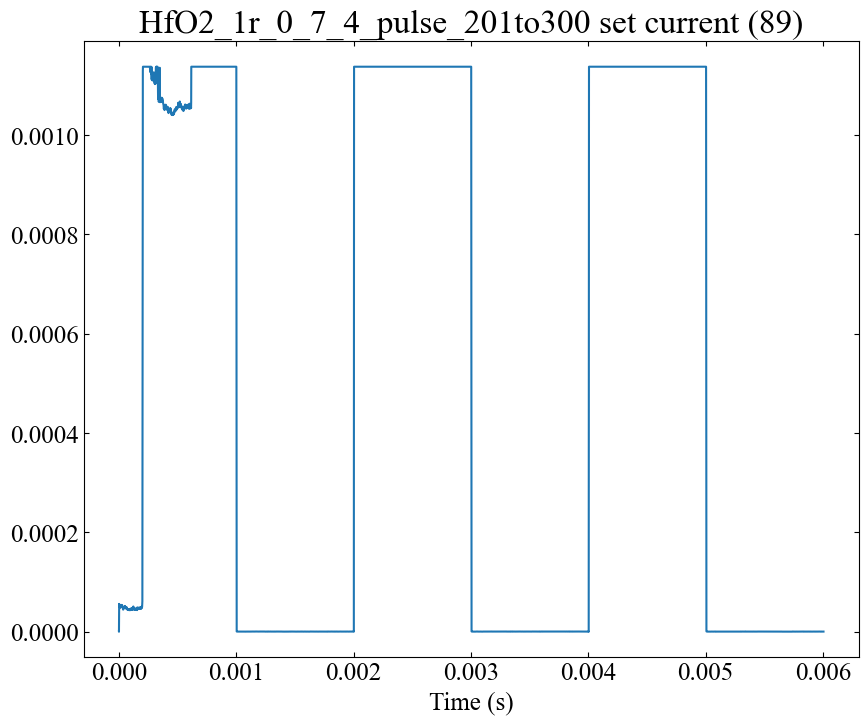

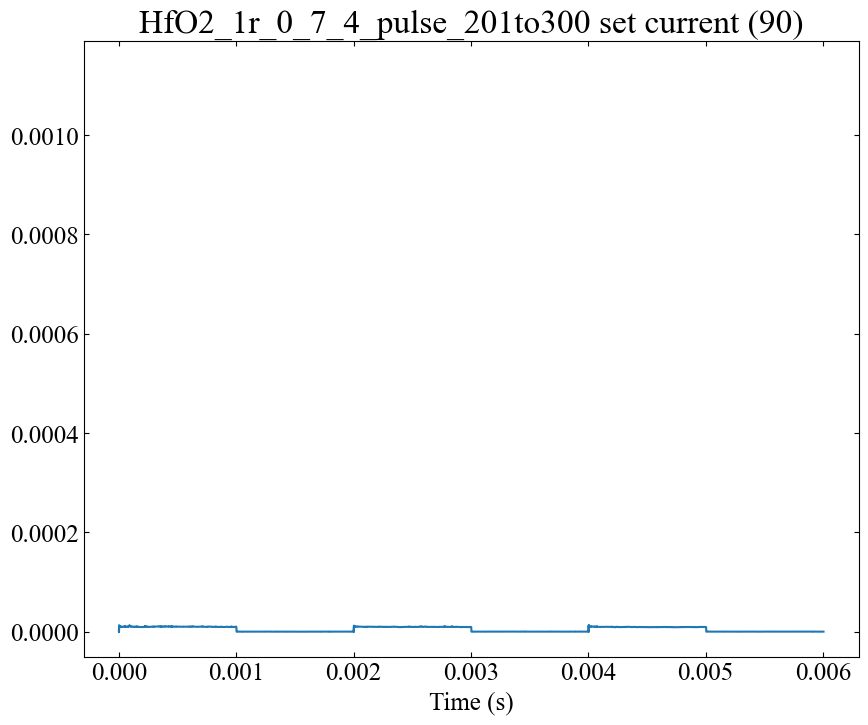

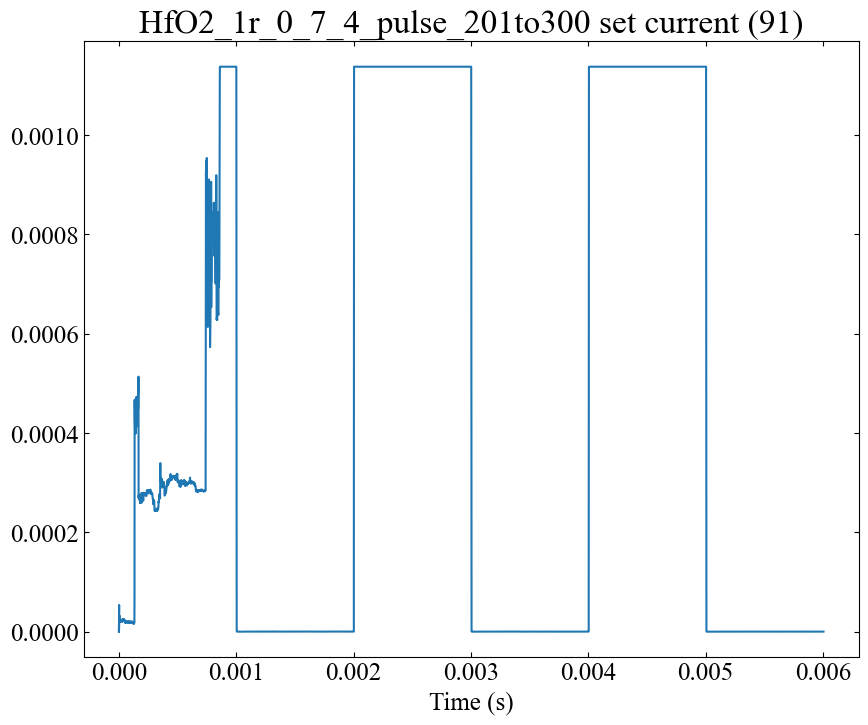

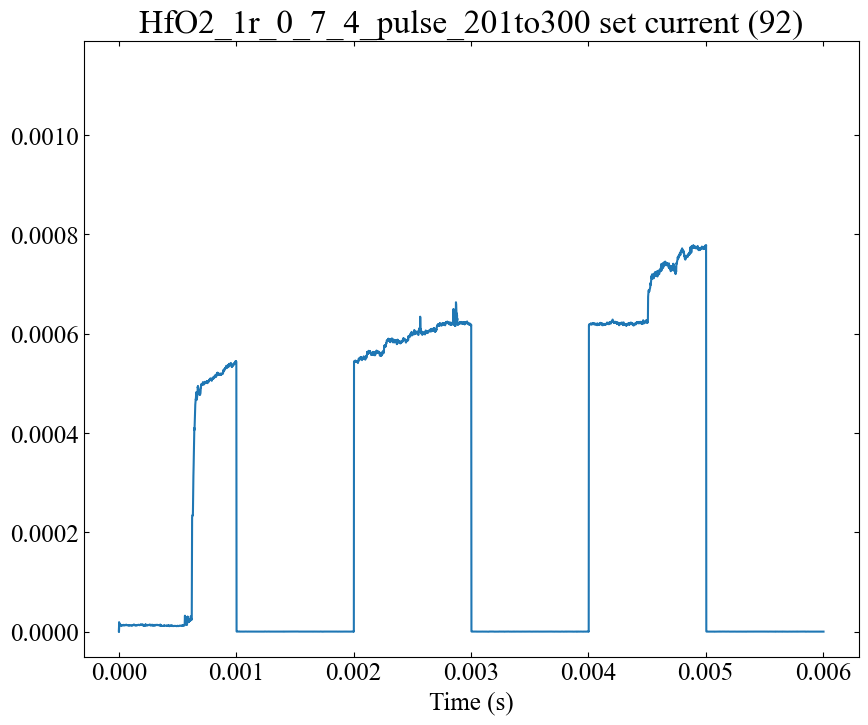

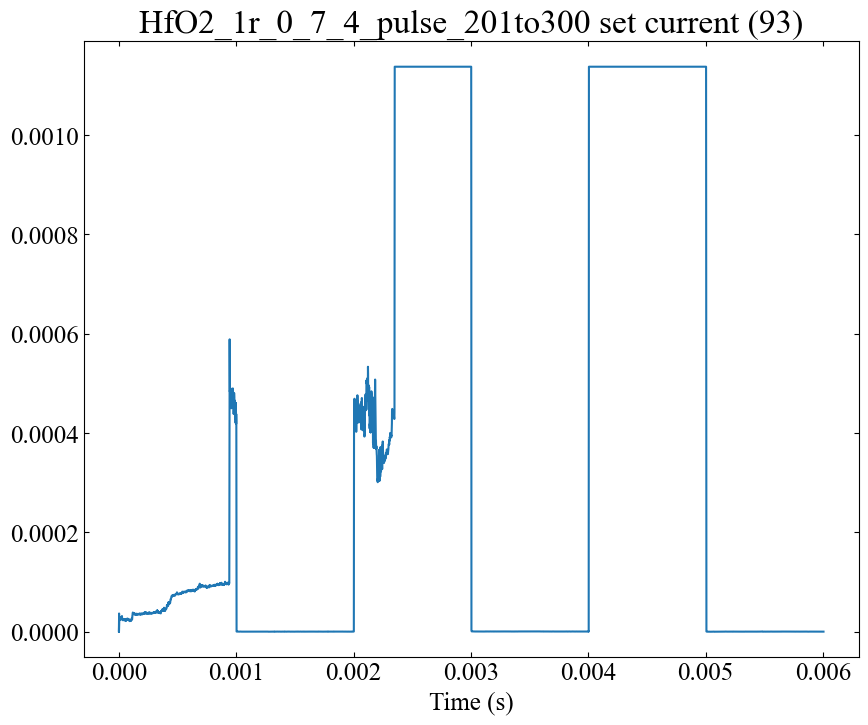

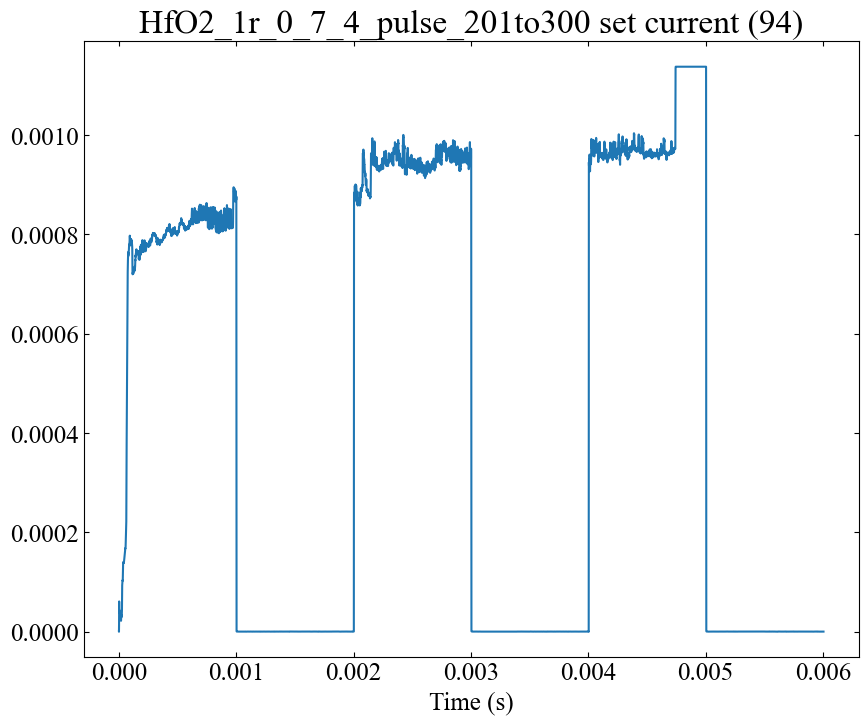

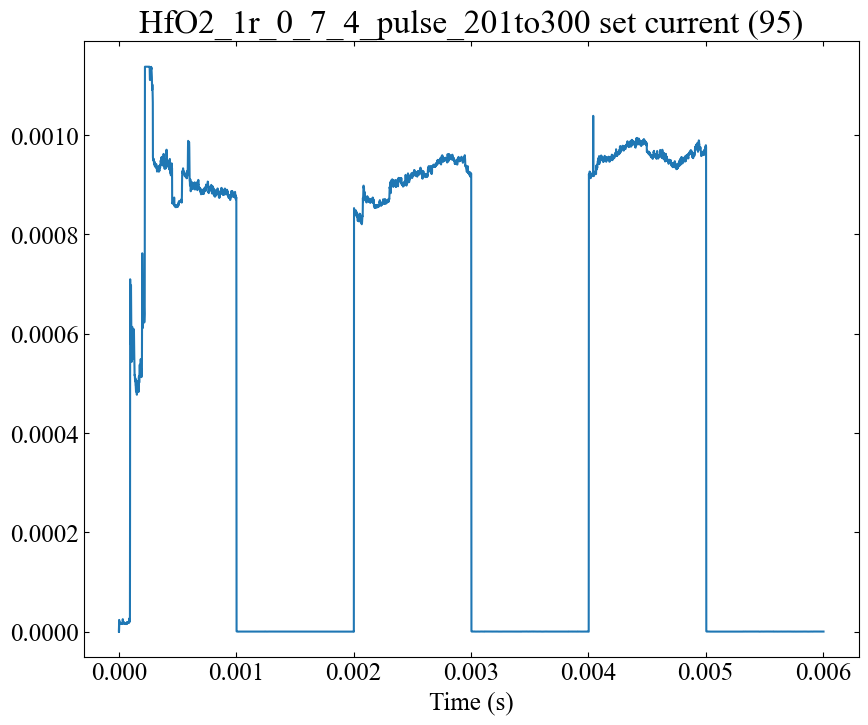

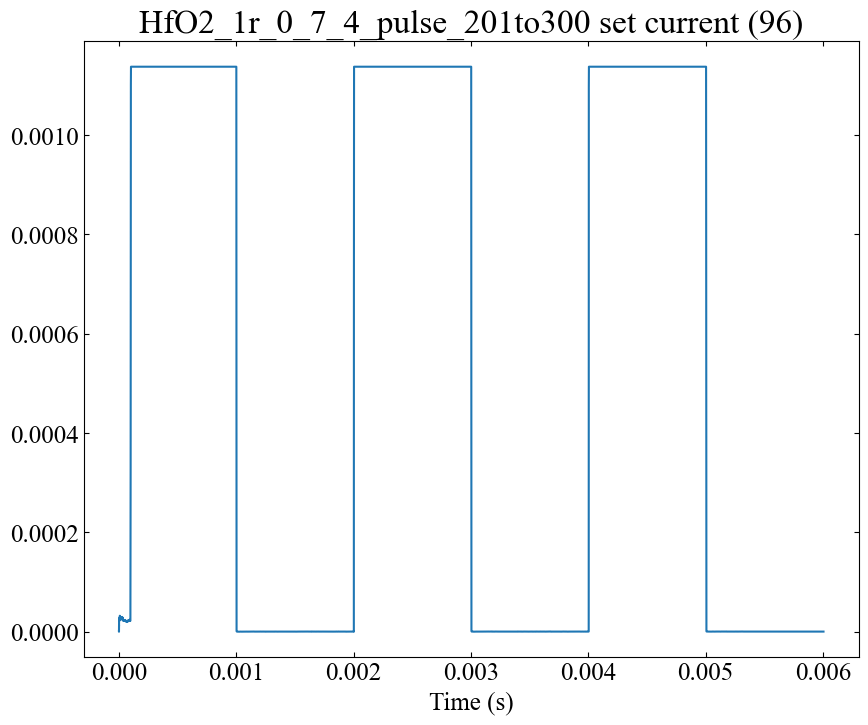

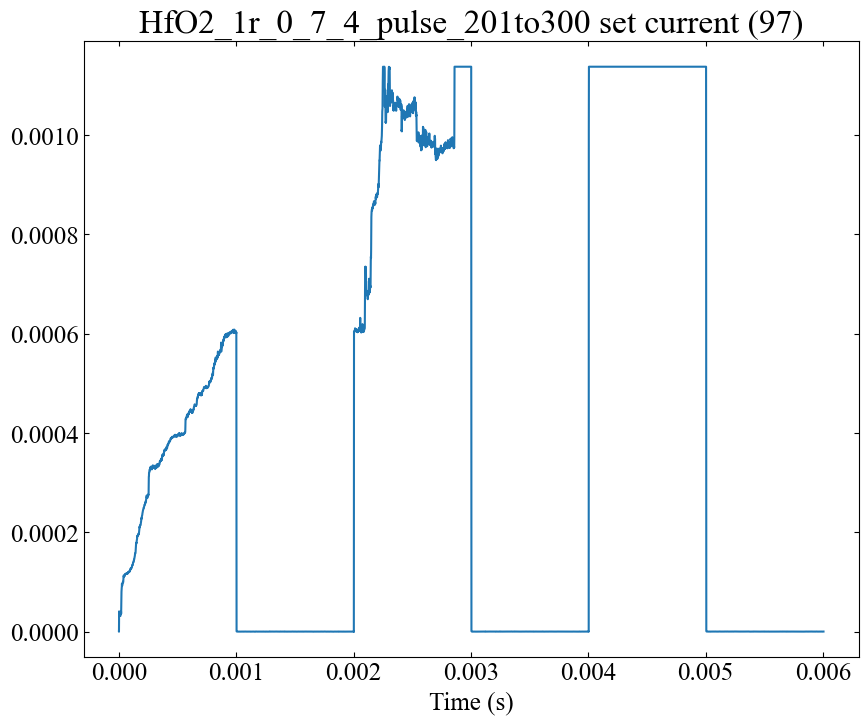

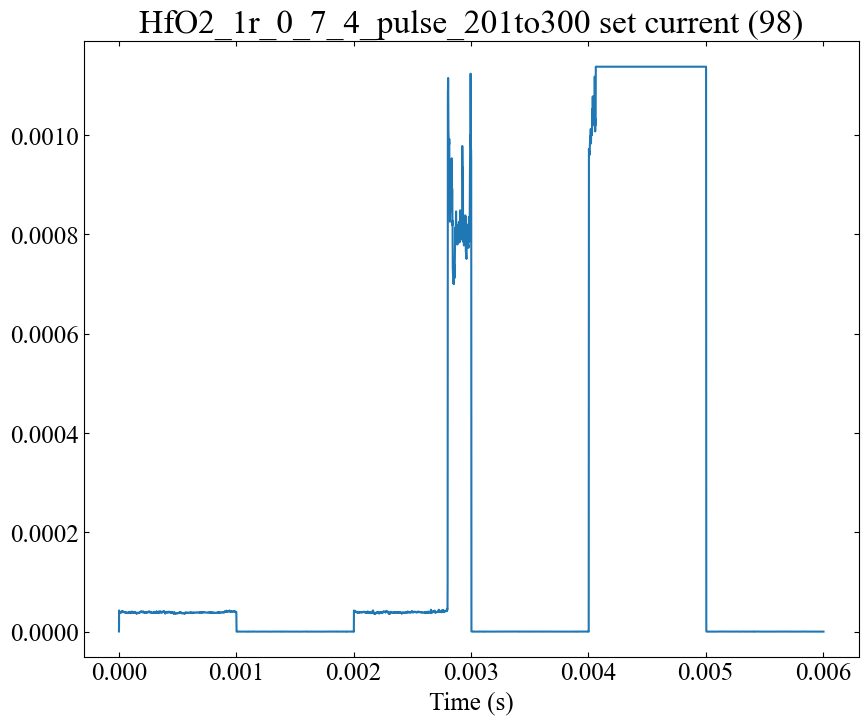

In [31]:
set_file_len = len(set_df["Time (s)"].unique())
set_time_vector = set_df["Time (s)"].iloc[:set_file_len]
set_values = set_df["abs(Id)"].values.reshape(-1, set_file_len)
for i, set_vector in enumerate(set_values, start=1):
    fig, ax = plt.subplots(figsize=FIGSIZE)
    title = f"{FIG_TITLE} set current ({i})"
    ax.set(title=title, yscale="linear", ylim=(-5e-5, 1.19e-3))

    # Choose whether to use hue or not based on kwargs
    sns.lineplot(x=set_time_vector, y=set_vector, estimator=None, sort=False, ax=ax)

    ax.tick_params(axis='both', which='major', direction='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor', bottom=False, top=False, left=False, right=False)
    plt.show()

In [21]:
def export_for_origin(read_df: list, set_df: pd.DataFrame, reset_df: pd.DataFrame):
    """
    Exports the provided data frames to an Excel file for Origin.
    """
    readLRS, readHRS = read_df
    set_file_len = len(set_df["Time (s)"].unique())
    reset_file_len = len(reset_df["Time (s)"].unique())

    set_time_vector = set_df["Time (s)"].iloc[:set_file_len]
    set_values = np.vstack((set_time_vector, set_df["Vd (V)"].values.reshape(-1, set_file_len)))
    set_vd_df = pd.DataFrame(set_values.T, columns=["Time (s)", *[f"Vd{x}" for x in range(set_values.shape[0]-1)]])
    set_values = np.vstack((set_time_vector, set_df["abs(Id)"].values.reshape(-1, set_file_len)))
    set_id_df = pd.DataFrame(set_values.T, columns=["Time (s)", *[f"Id{x}" for x in range(set_values.shape[0]-1)]])

    reset_time_vector = reset_df["Time (s)"].iloc[:reset_file_len]
    reset_values = np.vstack((reset_time_vector, reset_df["Vd (V)"].values.reshape(-1, reset_file_len)))
    reset_vd_df = pd.DataFrame(reset_values.T, columns=["Time (s)", *[f"Vd{x}" for x in range(reset_values.shape[0]-1)]])
    reset_values = np.vstack((reset_time_vector, reset_df["abs(Id)"].values.reshape(-1, reset_file_len)))
    reset_id_df = pd.DataFrame(reset_values.T, columns=["Time (s)", *[f"Id{x}" for x in range(reset_values.shape[0]-1)]])

    # Create a excel file for origin
    output_file = os.path.join(FILE_PATH, "for_origin.xlsx")
    empty_df = pd.DataFrame()
    empty_df.to_excel(output_file)
    print("Exporting to:", output_file)

    with pd.ExcelWriter(output_file, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
        readLRS.to_excel(writer, sheet_name="HRS", index=False)
        readHRS.to_excel(writer, sheet_name="LRS", index=False)
        set_vd_df.to_excel(writer, sheet_name="Set Vd", index=False)
        set_id_df.to_excel(writer, sheet_name="Set Id", index=False)
        reset_vd_df.to_excel(writer, sheet_name="Reset Vd", index=False)
        reset_id_df.to_excel(writer, sheet_name="Reset Id", index=False)


export_for_origin(read_df, set_df, reset_df)
# export_for_origin(read_df)

Exporting to: ../raw data/20250417/HfO2_1r_0_7_4_pulse_201to300/for_origin.xlsx
